# Plotting with ggplot (plotnine)

Shahryar Noei, based on R codes by Marco Chierici

April 29, 2025

# Managing scales

As soon as you specify an `aes()` mapping, `ggplot2` automatically uses a *scale* to compute the range of values of the variables. So when you write `ggplot(mpg, aes(x=displ, y=cty, color=class)) + geom_point()` 
under the hood `ggplot2` adds a scale for each mapping:
`ggplot(mpg, aes(x=displ, y=cty, color=class)) + geom_point() +
  scale_x_continuous() +
  scale_y_continuous() +
  scale_color_discrete()`

One of the parameters you'll most likely would like to change is the set of colors to use. A convenient option is to leverage predefined palettes from <http://colorbrewer.org> with the `scale_color_brewer()` function:

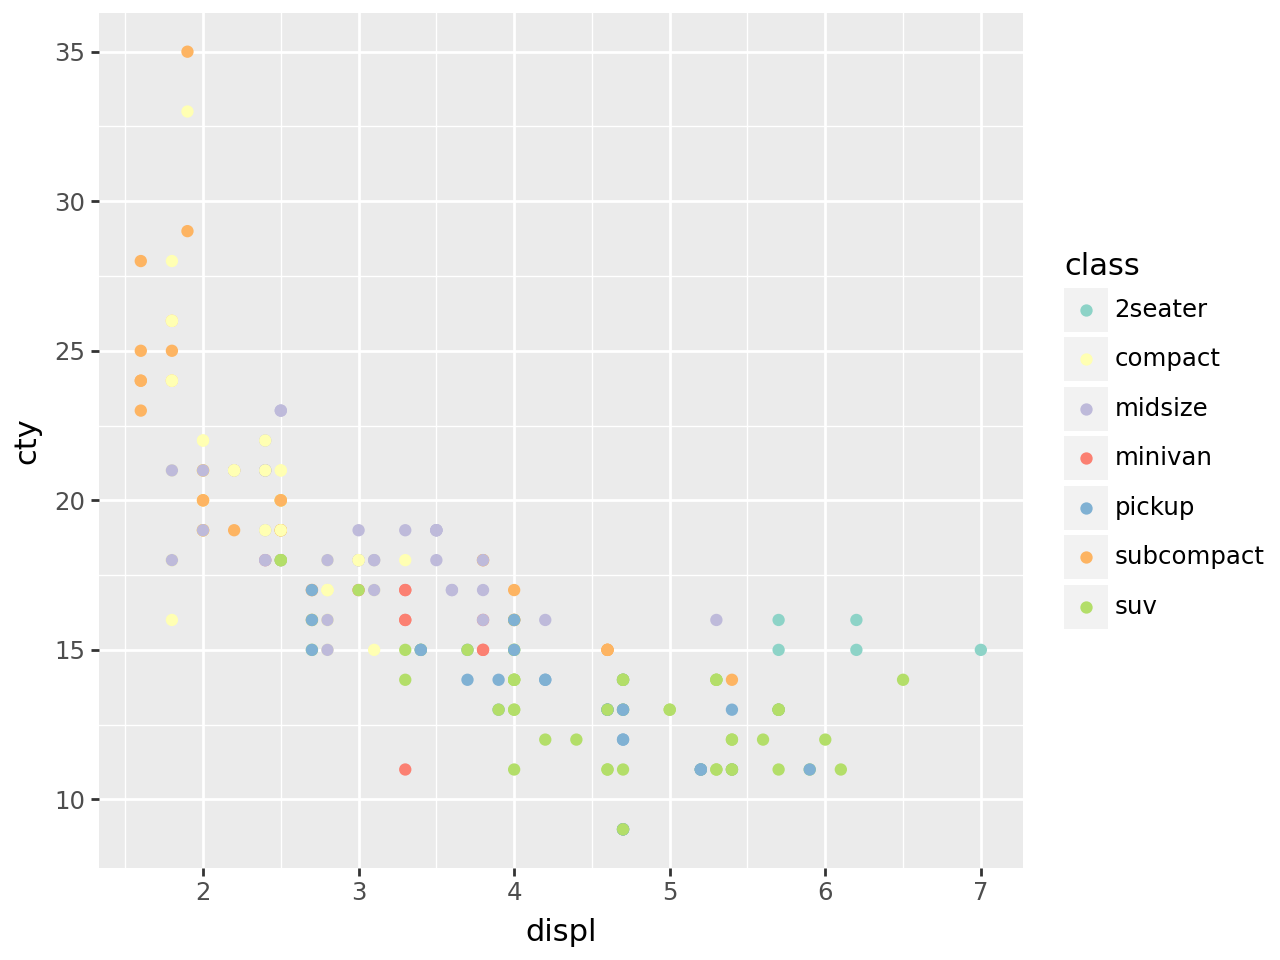

In [154]:
from plotnine import ggplot, aes, geom_point, scale_color_brewer
from plotnine.data import mpg

ggplot(mpg, aes(x='displ', y='cty', color='class')) + geom_point() + scale_color_brewer(type='qual', palette='Set3')

You can also specify continuous color values using a gradient scale, or manually specify the colors you like as a named vector.

Hint: here's a convenient online tool for finding out hexadecimal color codes! <https://www.color-hex.com/>

# Bar charts

Consider a basic bar chart, as drawn with `geom_bar()`, to display the total number of diamonds grouped by cut:

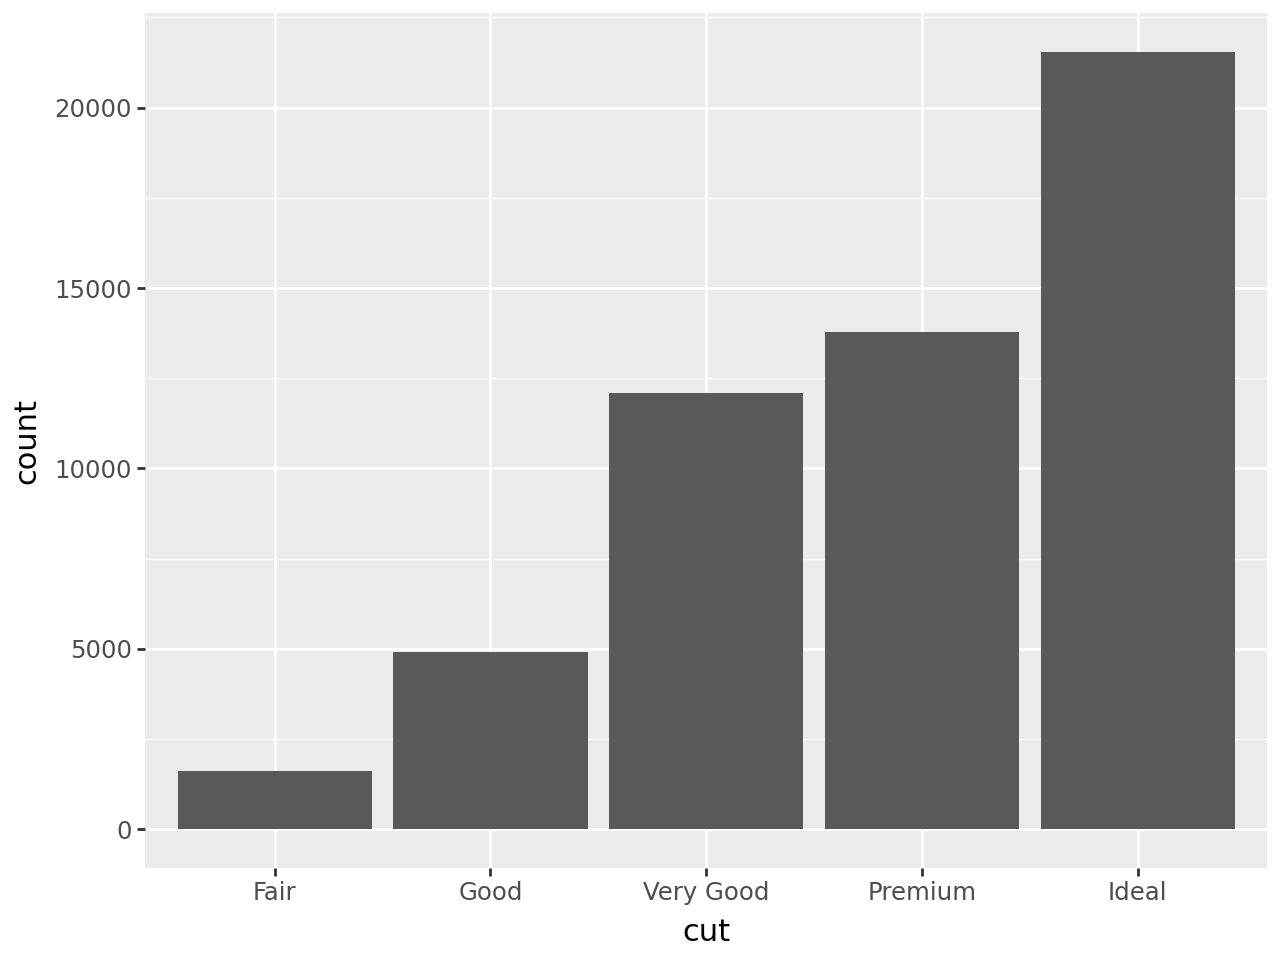

In [155]:
from plotnine import geom_bar
from plotnine.data import diamonds


ggplot(diamonds, aes(x='cut')) + geom_bar()


## Statistical transformations

Another interesting observation about `geom_bar` is that it automatically *counted* the number of elements belonging to each level of `diamonds.cut`: these counts are not part of the data set. In other words, a *statistical transformation* (`stat_count`) was implicitly applied to the data.

There are many other statistical transformations: for example, "identity" leaves the data "as is" and can be useful when you already have a count variable and want to create a bar chart from it, like in the following example.

/tmp/ipykernel_14355/2392867785.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


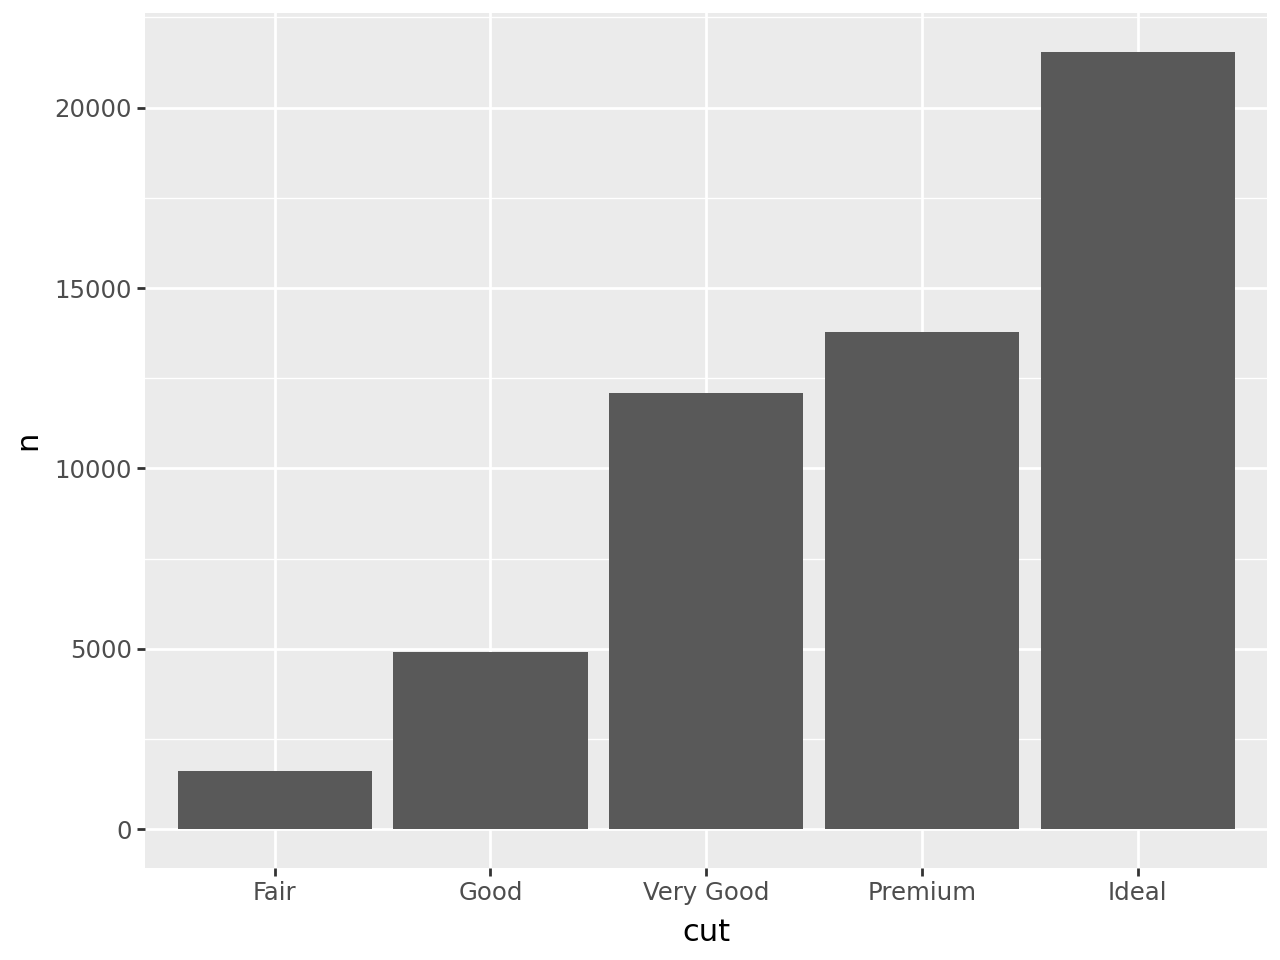

In [156]:
import pandas as pd
cut_count = diamonds.groupby('cut').size().reset_index(name='n')

ggplot(cut_count, aes(x='cut', y='n')) + geom_bar(stat='identity')

besides passing a statistical transformation as argument to a `geom` layer, you can use a statistical function itself as a layer!

In the previous scatterplot of highway consumption vs. displacement, suppose we want to add the mean highway consumption at each displacement value.

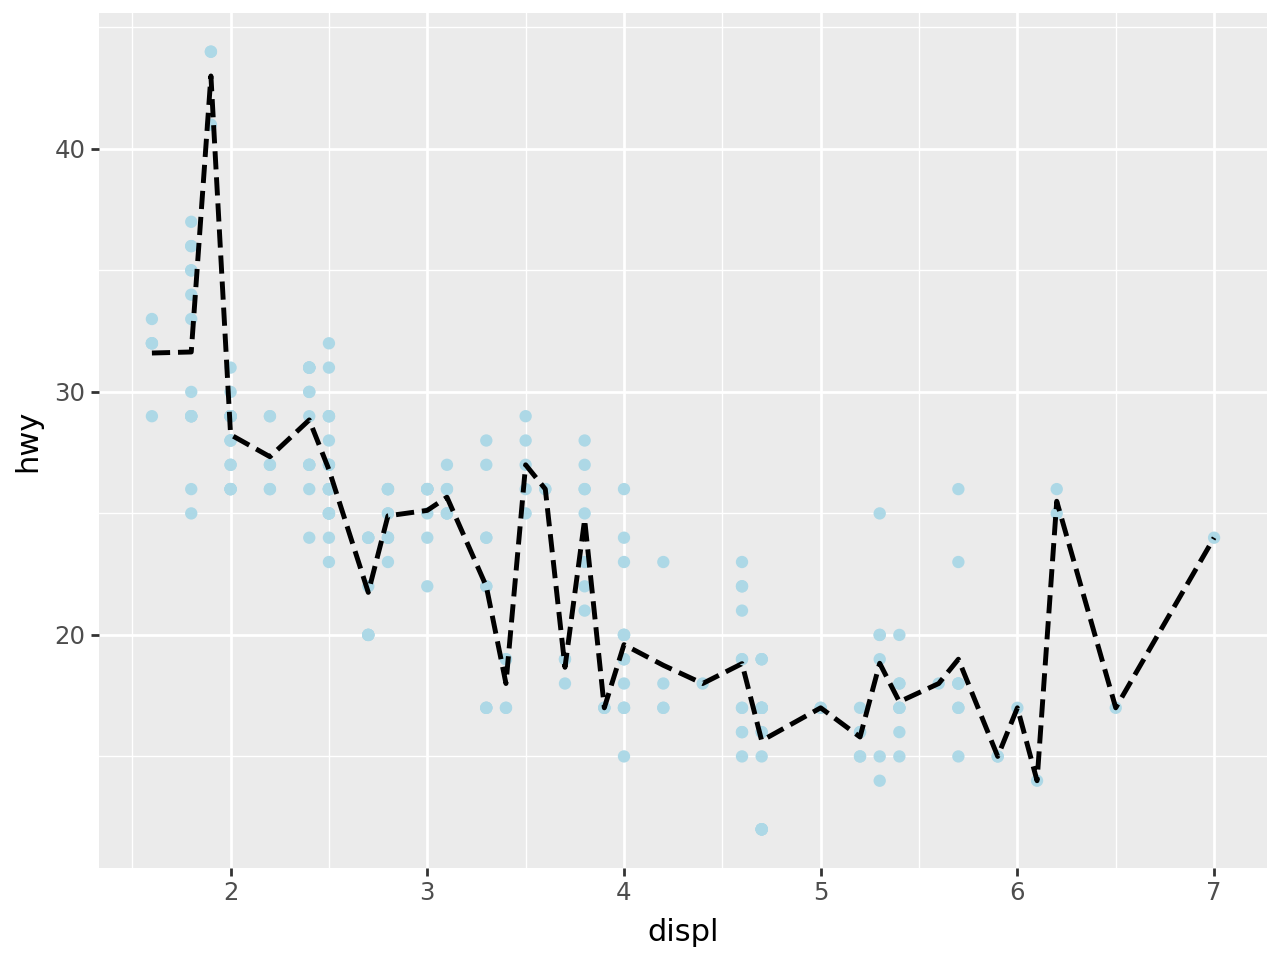

In [157]:
from plotnine import stat_summary
import numpy as np 
(
    ggplot(mpg, aes(x='displ', y='hwy'))
    + geom_point(color='lightblue')
    + stat_summary(fun_y=np.mean, geom='line', size=1, linetype='dashed')
)
# This depends on the versio of ggplot you are using, in the newest version just "mean" is enough

## Position arguments

Each geometry layer has a default position adjustment that defines how different components should be positioned relative to each other.

This is particularly evident in the `geom_bar` layer if we map a variable to a color:

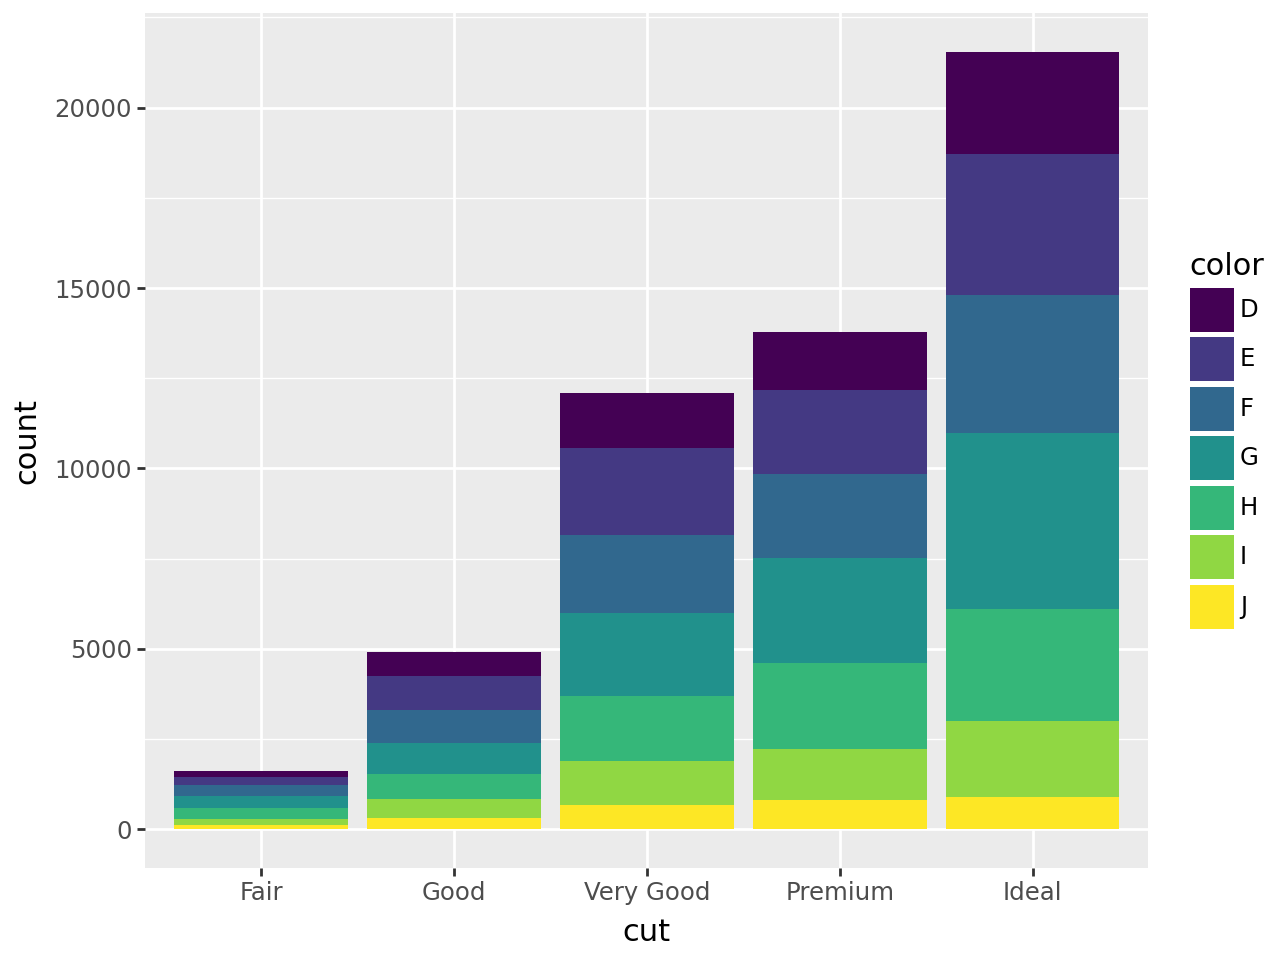

In [158]:
gg = ggplot(diamonds, aes(x='cut', fill='color'))
gg + geom_bar()

We notice that by default each of the rectangles is stacked on top of each other: this is because the default position adjustment for `geom_bar` is `position="stack"`.

Changing the position allows us to obtain different variations of a bar plot:

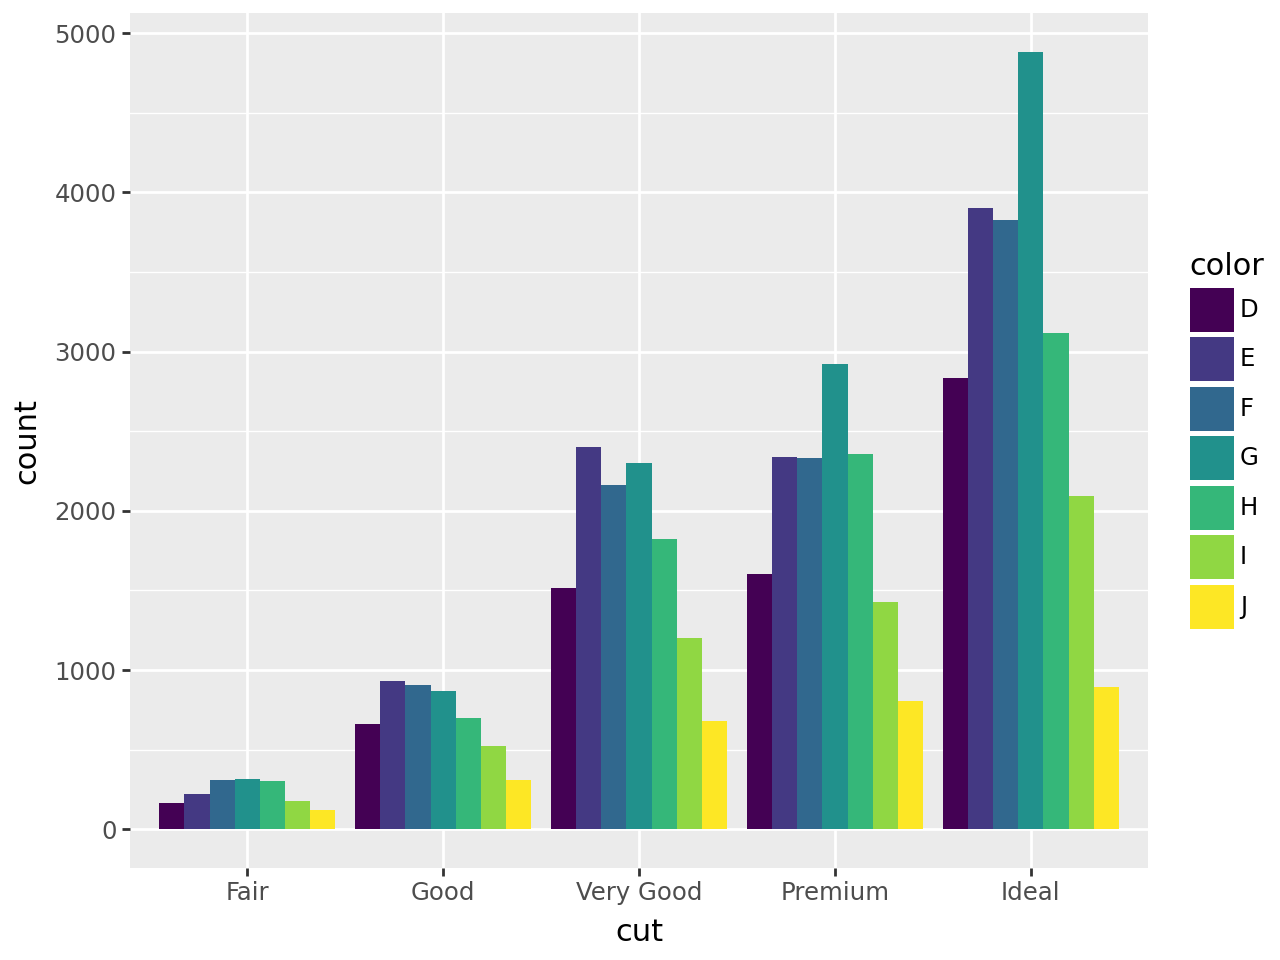

In [159]:
gg = ggplot(diamonds, aes(x="cut", fill="color"))
gg + geom_bar(position="dodge")

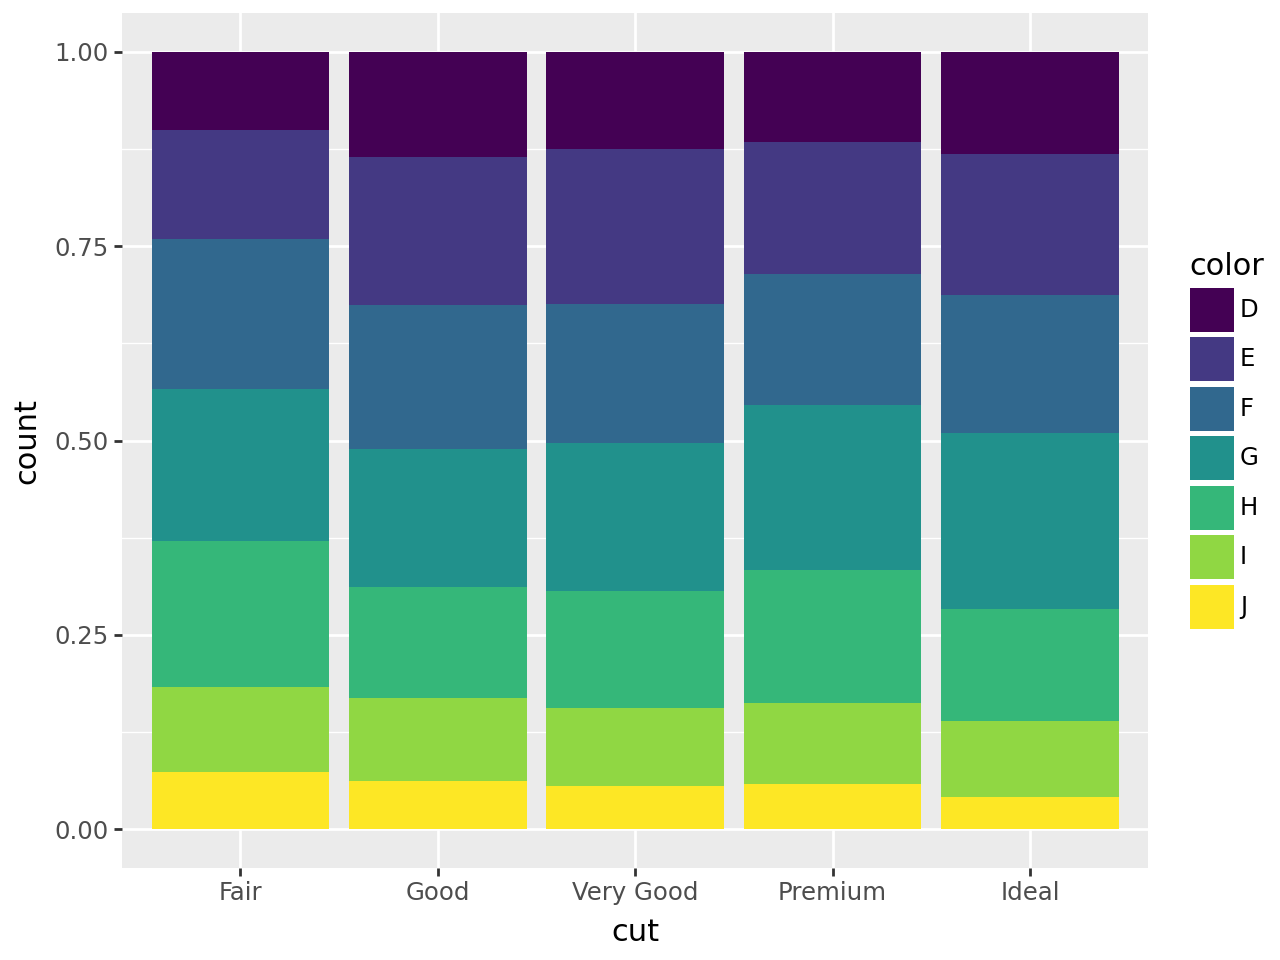

In [160]:
gg = ggplot(diamonds, aes(x="cut", fill="color"))
gg + geom_bar(position="fill")

## Horizontal bar charts

Want to draw a horizontal bar chart? Easy peasy: just add `coord_flip()` as your final layer!

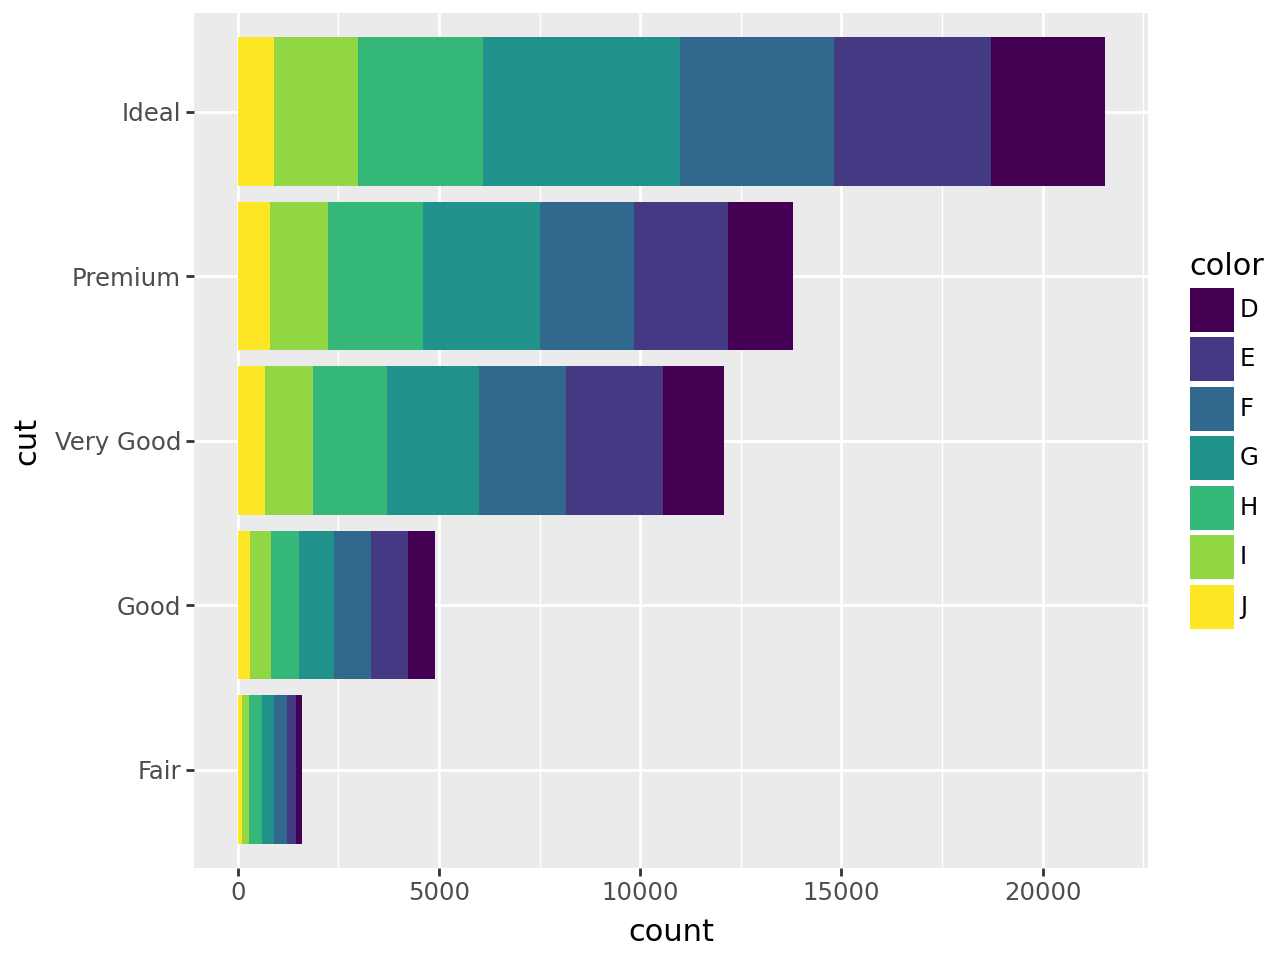

In [161]:
from plotnine import coord_flip
#gg + coord_flip() 
# this won't work as coord flip in order to work, needs to work on some geom
# to solve this, we simply add geom_bar so that the axis of the latter will be flipped

gg + geom_bar() + coord_flip()

This is particularly helpful when long category names overlap under the x axis.

## Built-in themes

It is easy to apply a built-in theme using one of the `theme_*()` functions, like `theme_bw()`:

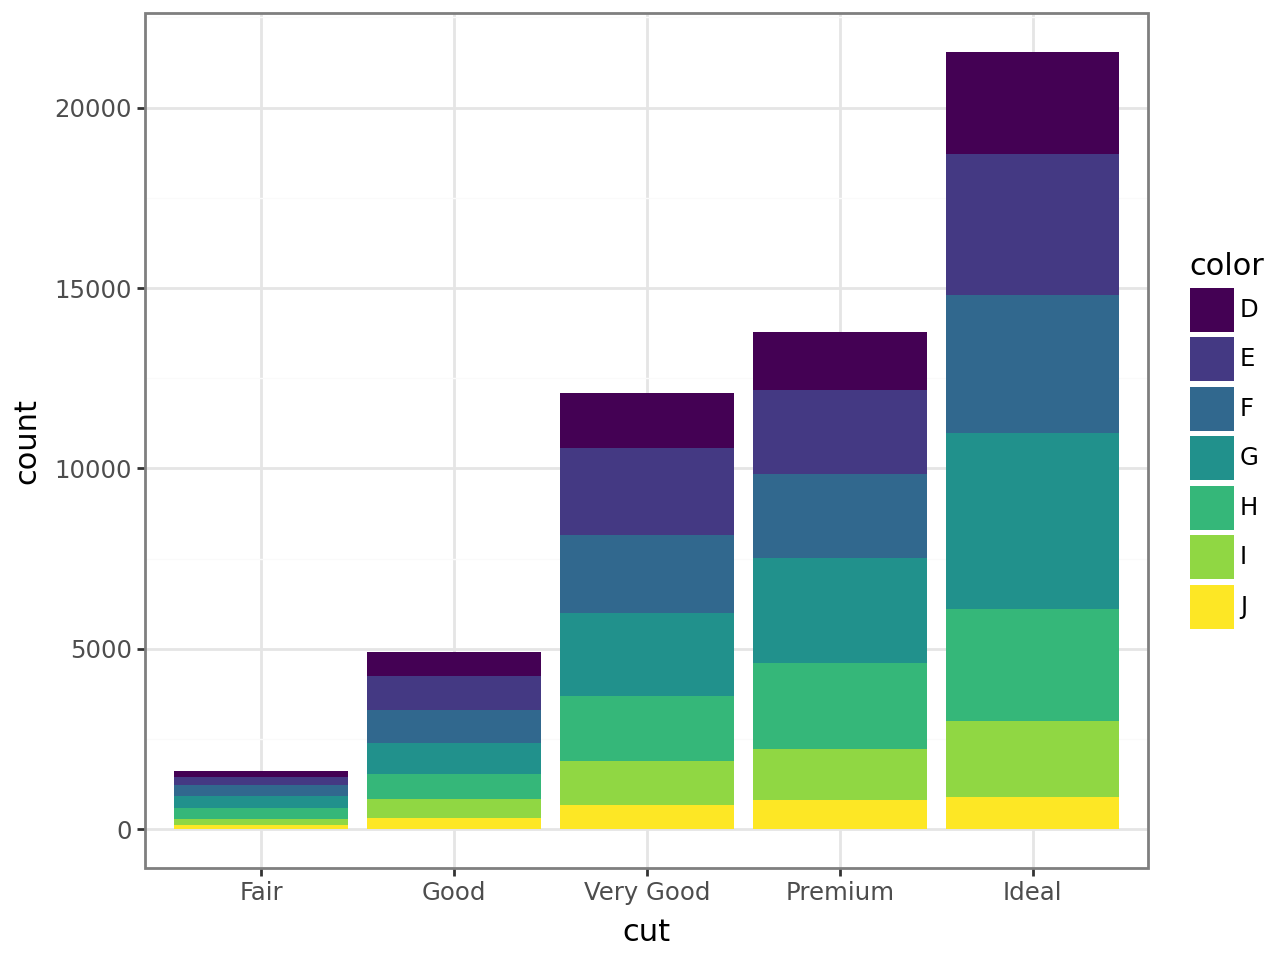

In [162]:
from plotnine import theme,theme_bw,theme_minimal,theme_classic,theme_dark
gg + geom_bar() + theme_bw()


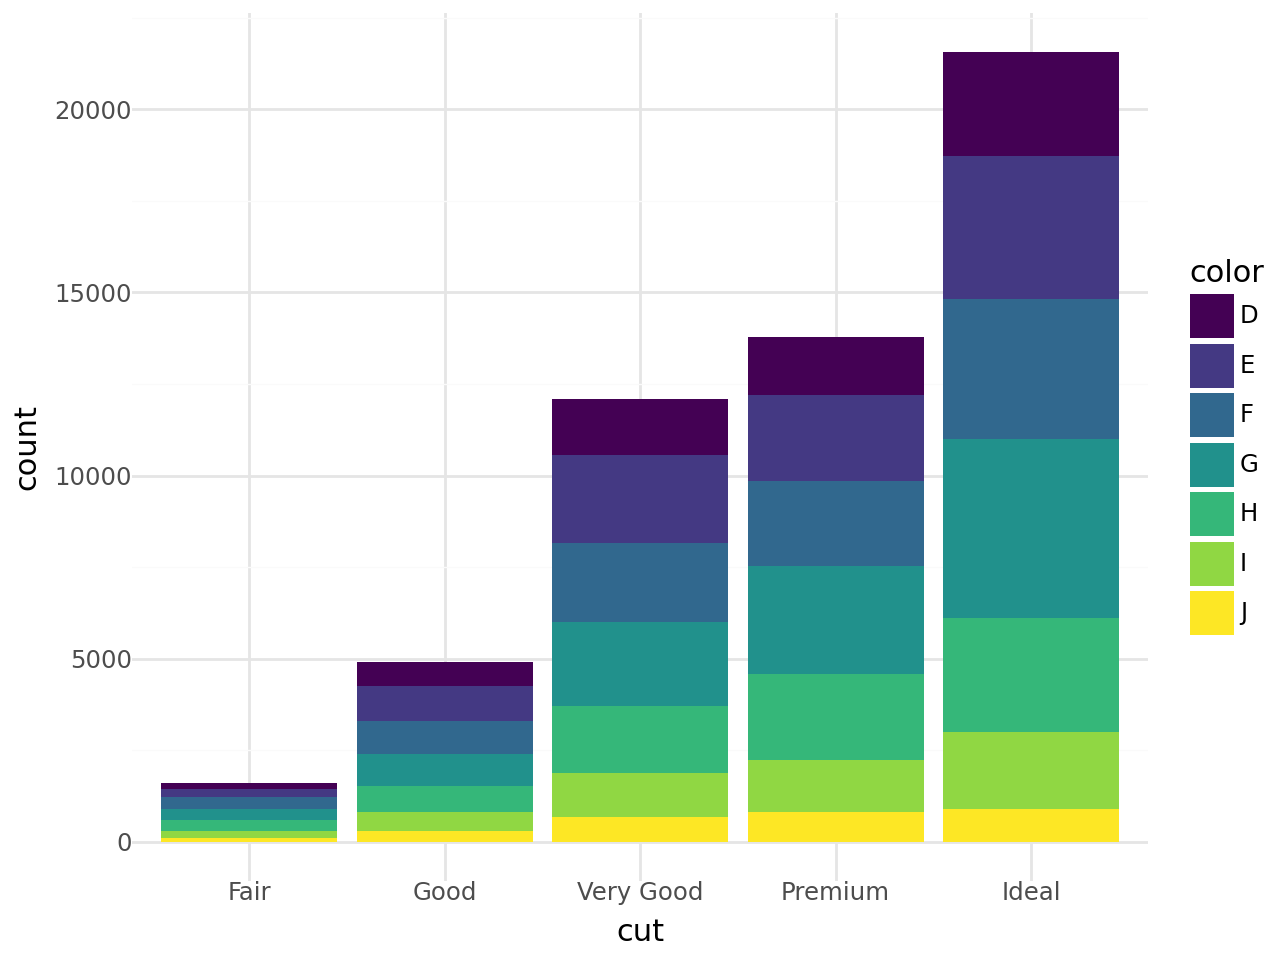

In [163]:
gg + geom_bar() + theme_minimal()

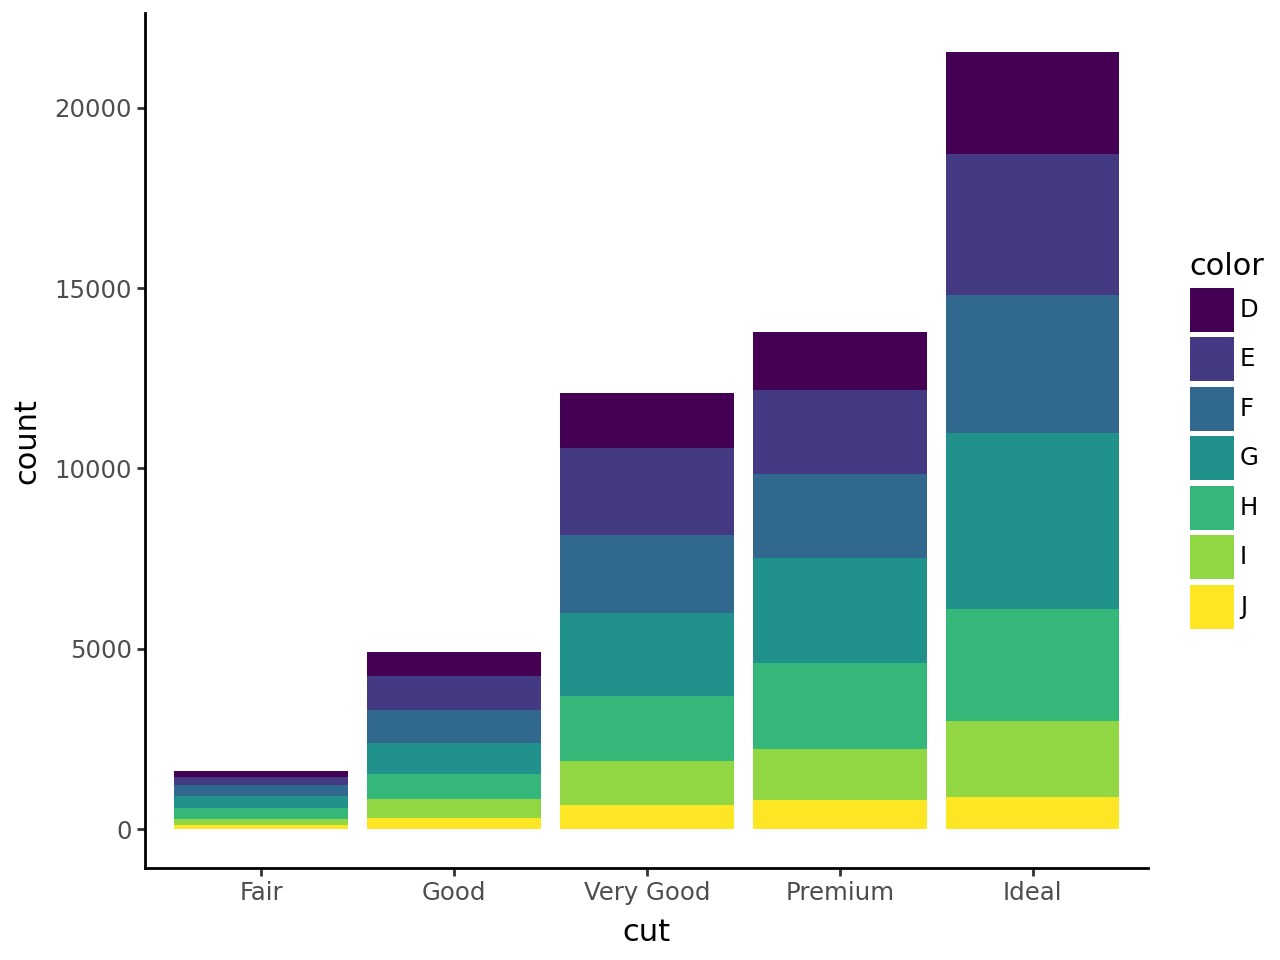

In [164]:

gg + geom_bar() + theme_classic()


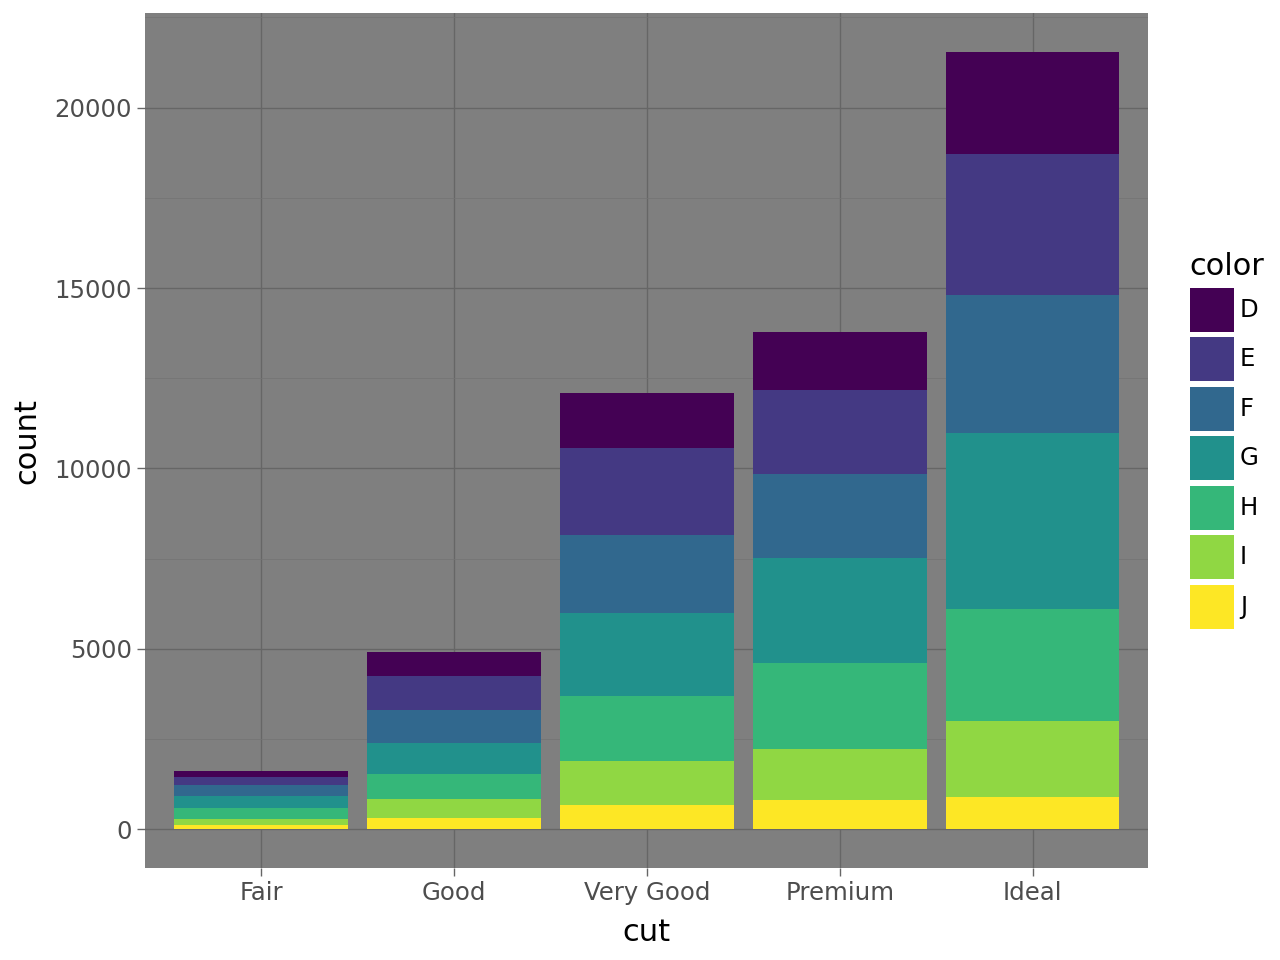

In [165]:
gg + geom_bar() + theme_dark()

If you need more tweaking, the `theme()` function allows you to really get into the details of the plot's look. We already saw an example of this when we switched off the legend:

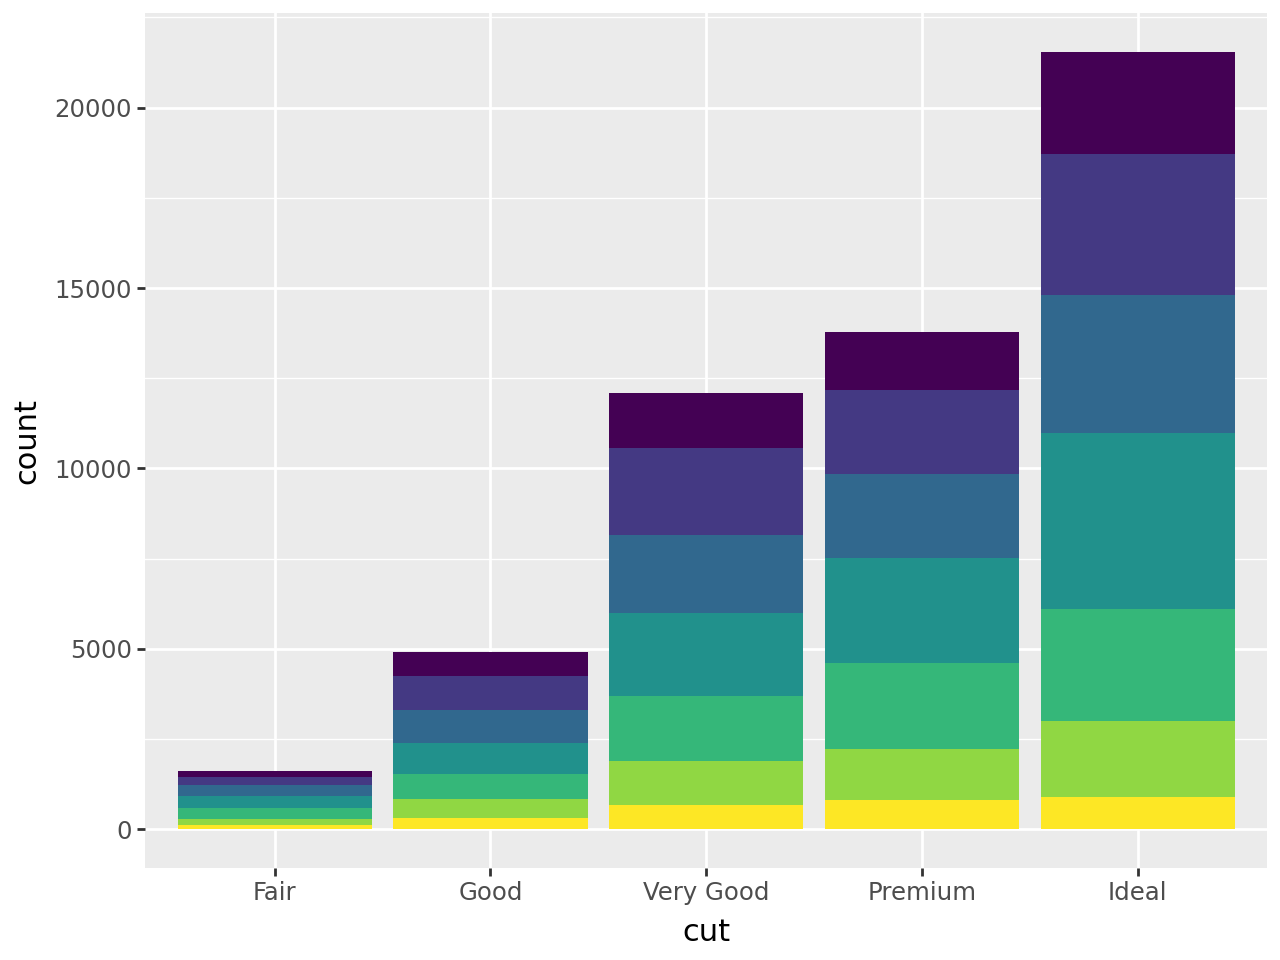

In [166]:
ggplot(diamonds, aes(x = "cut", fill = "color")) + geom_bar() + theme(legend_position="none")

What if I wanted to also apply a predefined theme at the same time?

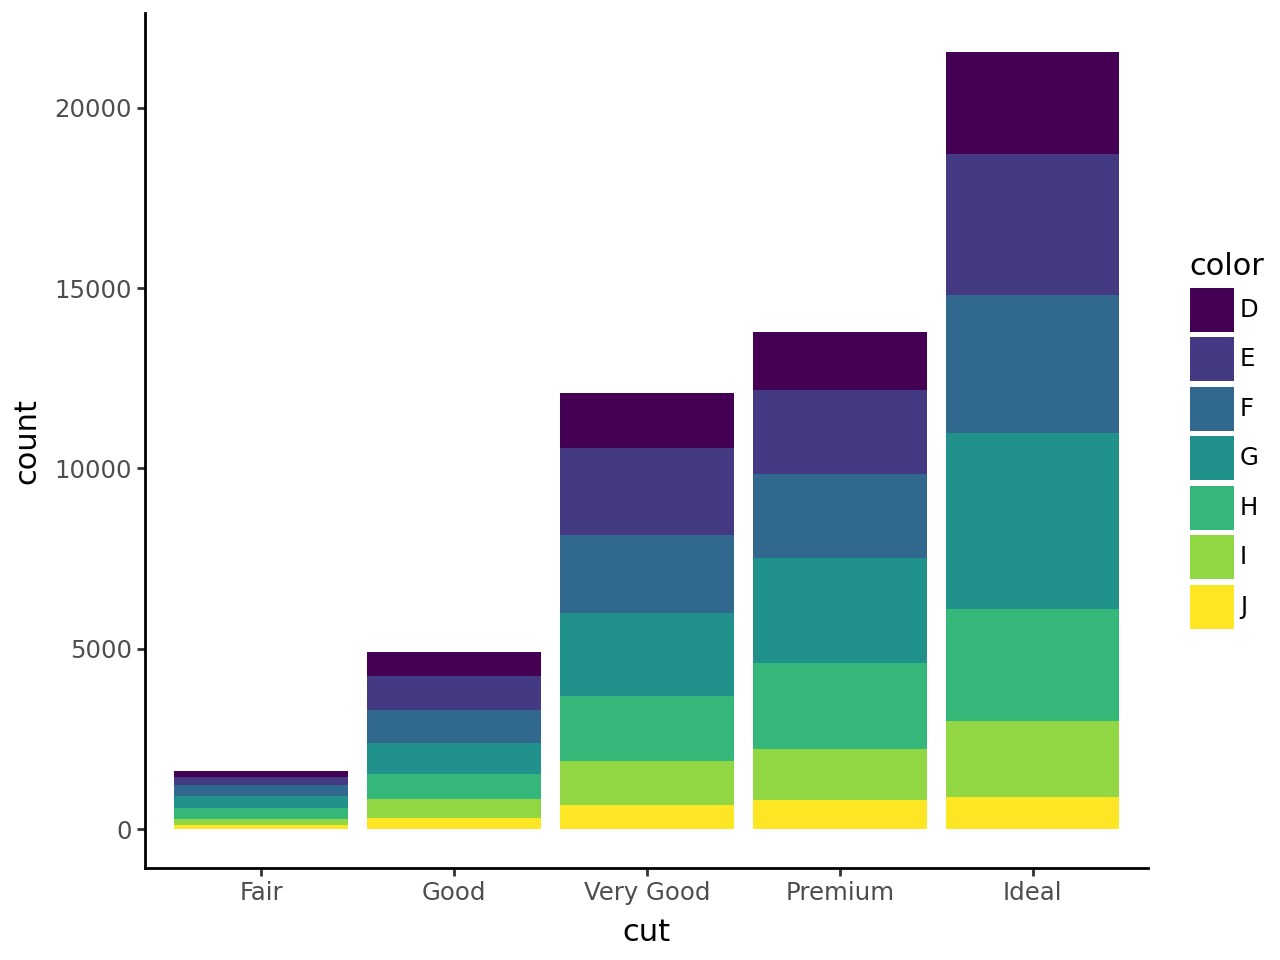

In [167]:
ggplot(diamonds, aes(x = "cut", fill = "color")) +geom_bar() + theme(legend_position="none") + theme_classic()

First apply a theme, and then alter its properties.

The properties of other theme items, like text font and size, can be altered within `theme()` by using special `element_` functions. They are of 4 major types.

1. `element_text()`: operates on textual properties (title, subtitle and captions)
2. `element_line()`: modifies line-based components (axis lines, major and minor grid lines, etc.)
3. `element_rect()`: modifies rectangle components such as plot and panel background
4. `element_blank()`: turns off displaying the theme item.

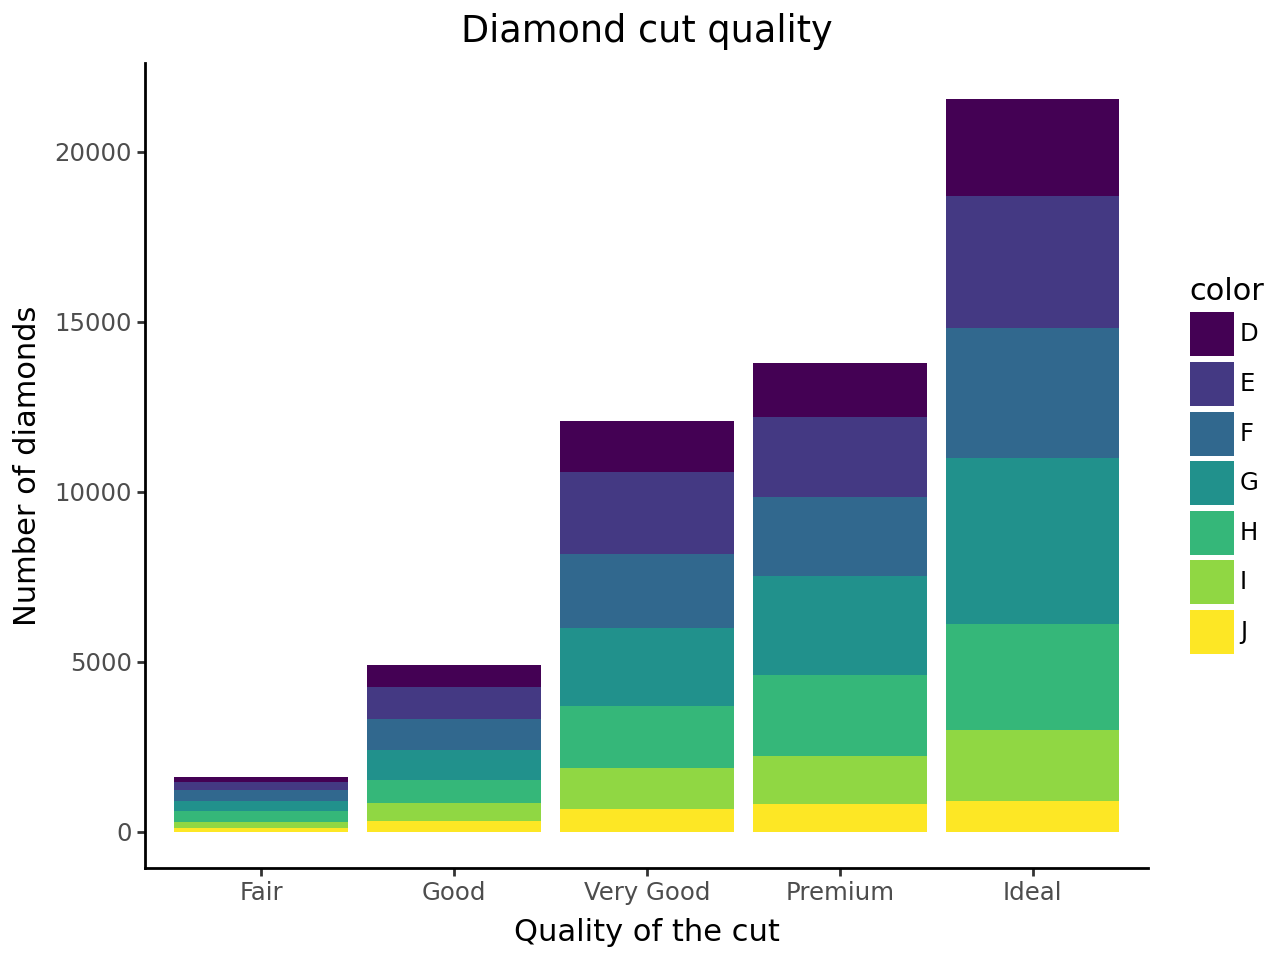

In [168]:
from plotnine import labs
gg = ggplot(diamonds, aes(x = "cut", fill = "color")) + geom_bar() + labs(title="Diamond cut quality",
       x="Quality of the cut",
       y="Number of diamonds") + theme_classic()
gg.show()

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


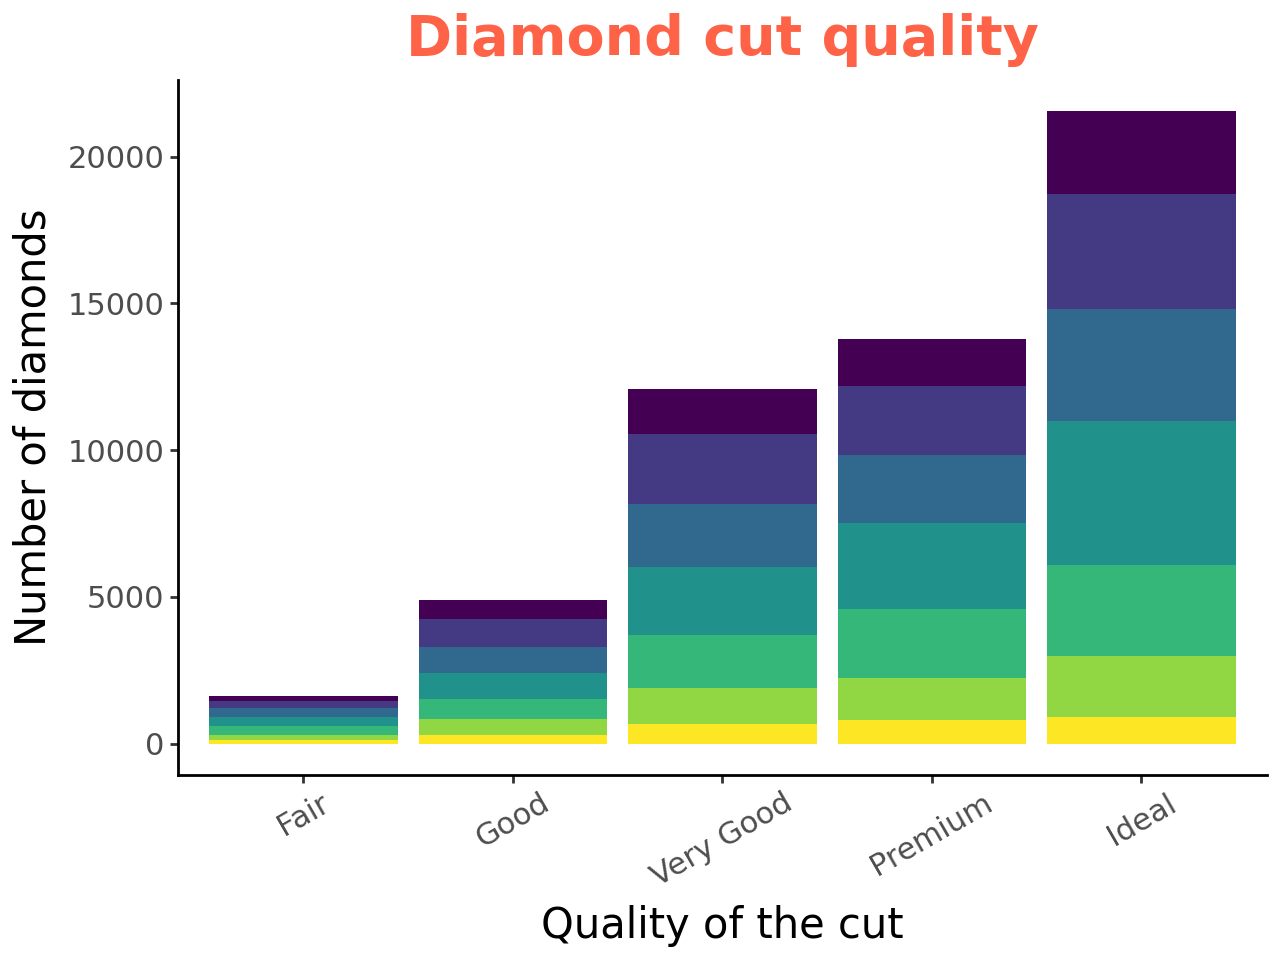

In [169]:
from plotnine import element_text
gg + theme(legend_position="none",
           plot_title=element_text(size=20, 
                                   face="bold", 
                                   family="Arial",
                                   color="tomato",
                                   hjust=0.5,
                                   lineheight=1.2),
           axis_title_x=element_text(size=15),
           axis_title_y=element_text(size=15),
           axis_text_x=element_text(angle=30, vjust=1, size=11),
           axis_text_y=element_text(size=11),
)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


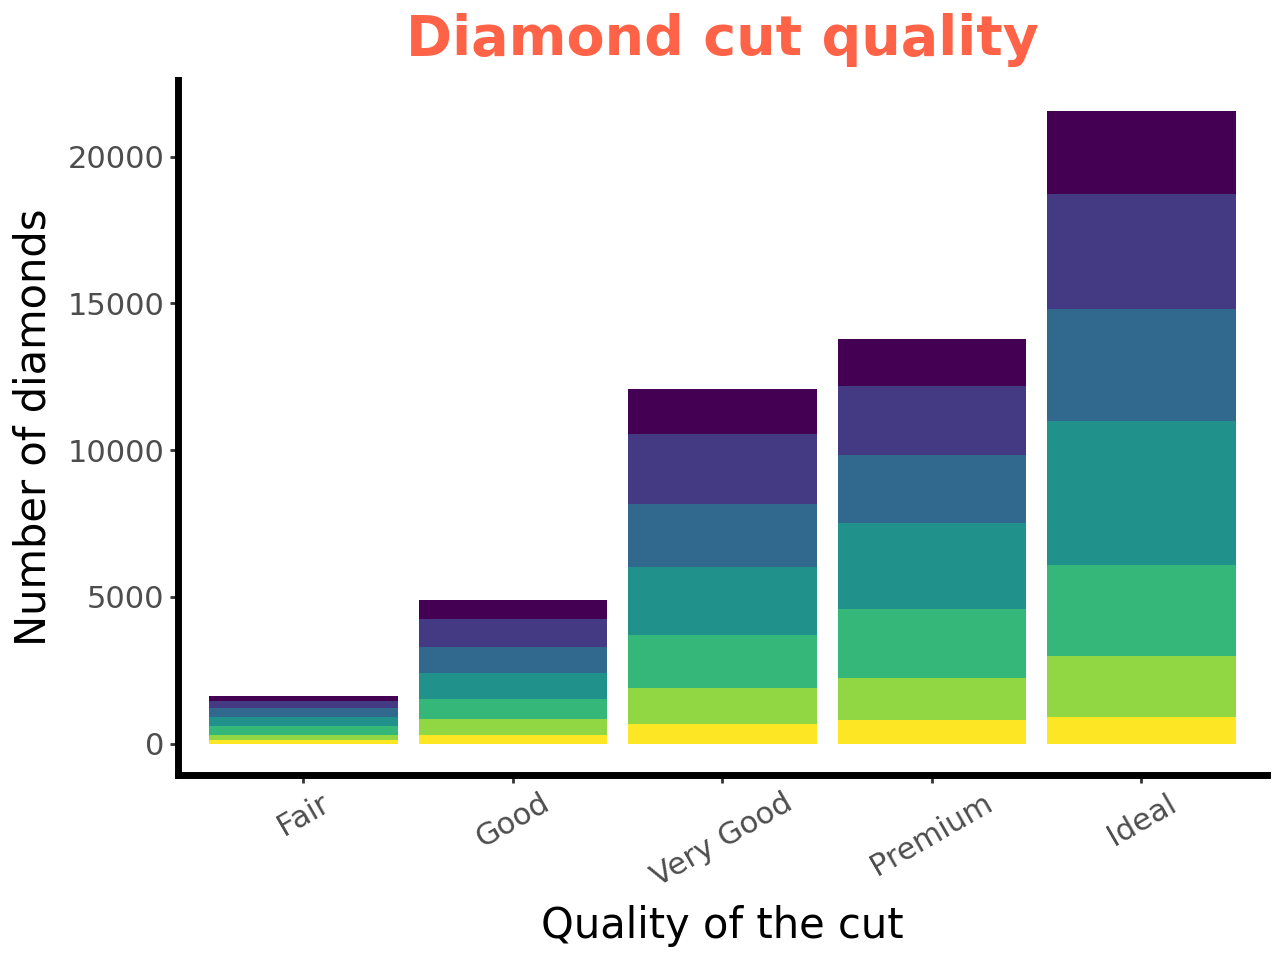

In [ ]:
from plotnine import element_line, element_text
# if we want to make the axis lines more thick, just use axis_line

gg + theme(legend_position="none",
           plot_title=element_text(size=20, 
                                   face="bold", 
                                   family="Arial",
                                   color="tomato",
                                   hjust=0.5,
                                   lineheight=1.2),
           axis_title_x=element_text(size=15),
           axis_title_y=element_text(size=15),
           axis_text_x=element_text(angle=30, vjust=1, size=11),
           axis_text_y=element_text(size=11),
           axis_line=element_line(color="black", size=2.5, linetype="solid"),
)

## Saving plots

Like your visualization? It may be tempting to export it with the "Export" menu in the "Plots" pane, but...

Do not succumb to the temptation of a mouse-based process. If might feel handy at the time, but you will regret it. This establishes no link between the source code and the figure product. 

To save the last plot with a command, you can use the `ggsave()` function:


ggsave(filename = "plots/barplot.png")


This is great to automate the export process for each plot in your script, but `ggsave()` also has extra options, like setting the DPI, which is useful for getting the right resolution for a specific use. For example, to export a plot for your presentation:

ggsave(filename = "plots/barplot_pres.png", dpi = "screen")


Note that the `dpi` argument can be either a number (e.g., 72) or a string (e.g., "screen", equivalent to 72).

About file formats:

* PDF is a good, quick option to export an easily shareable file with vector graphics.
* PNG is a good compressed format for graphics, but if you want to further customise your visualisation in a different program, use SVG or EPS, which are vector formats. (Try to open an SVG file in [Inkscape](https://inkscape.org/) for example.)

# Dealing with distributions


## Histograms

Histograms display numeric values on the X axis where the continuous variable is broken into intervals ("bins") and the the Y axis represents the frequency of observations that fall into that bin.

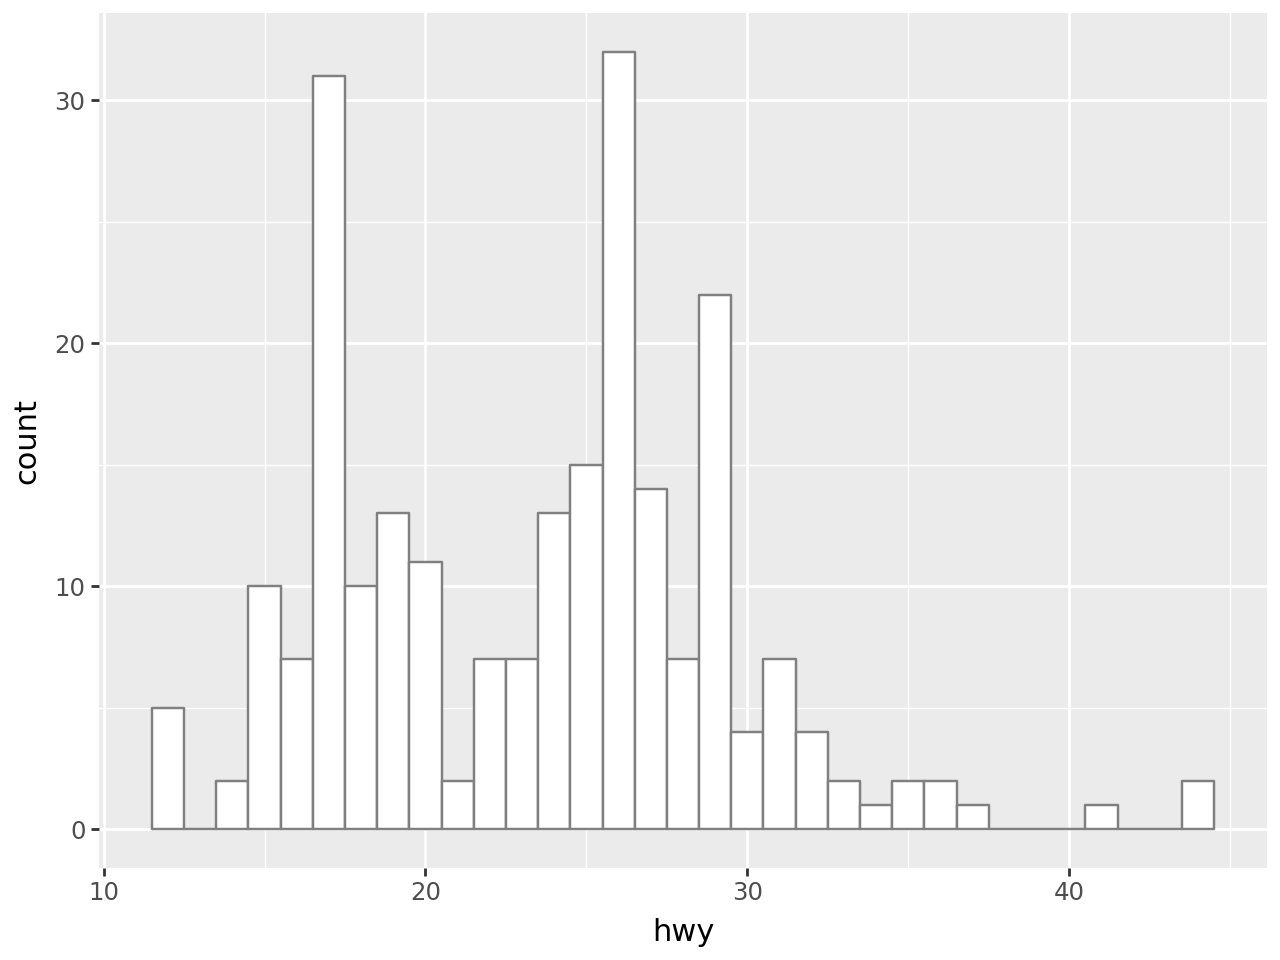

In [171]:
from plotnine import geom_histogram
g = ggplot(mpg, aes(x="hwy"))
g + geom_histogram(binwidth=1, color = 'gray', fill="white")

# smoothed histogram: density plot

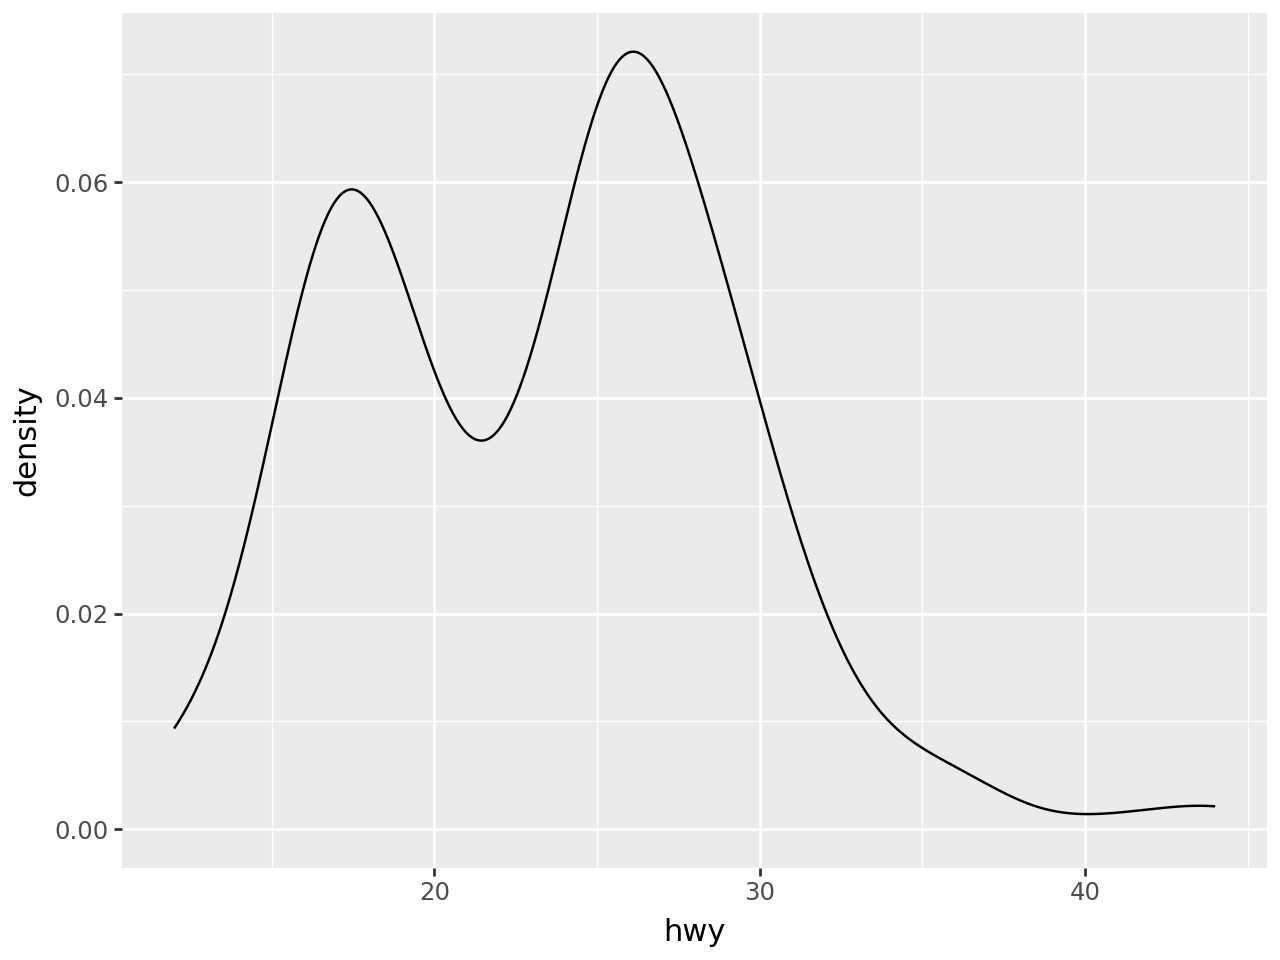

In [172]:
from plotnine import geom_density
g + geom_density()

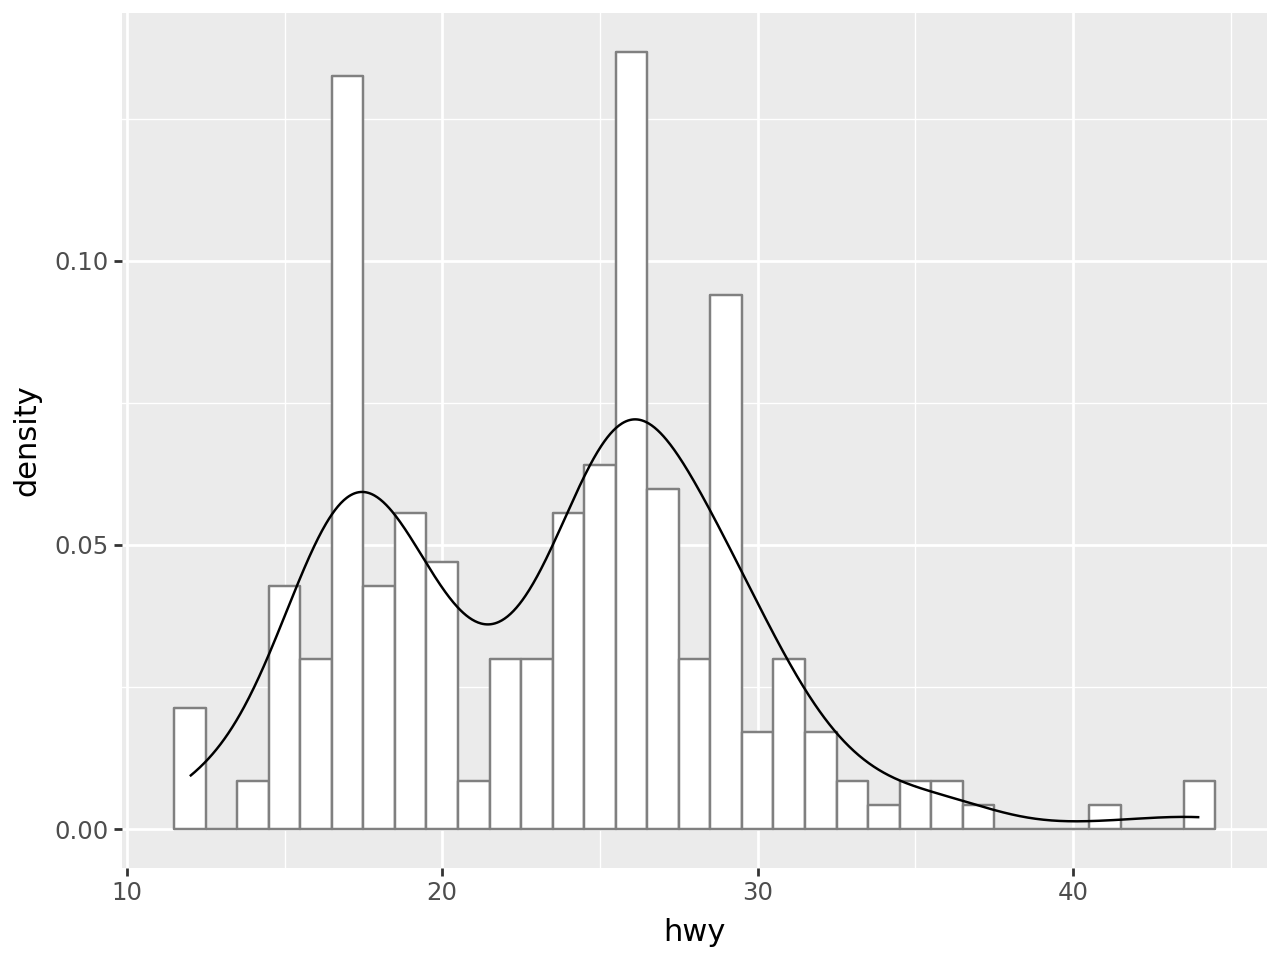

In [173]:
from plotnine import after_stat # we need this to plot the density on the y axis instead of the count
g + geom_histogram(aes(y=after_stat("density")),binwidth=1, color = 'gray', fill="white") + geom_density(alpha=0.2)

You can compare different groups by properly adjusting the `aes()` call, as usual:

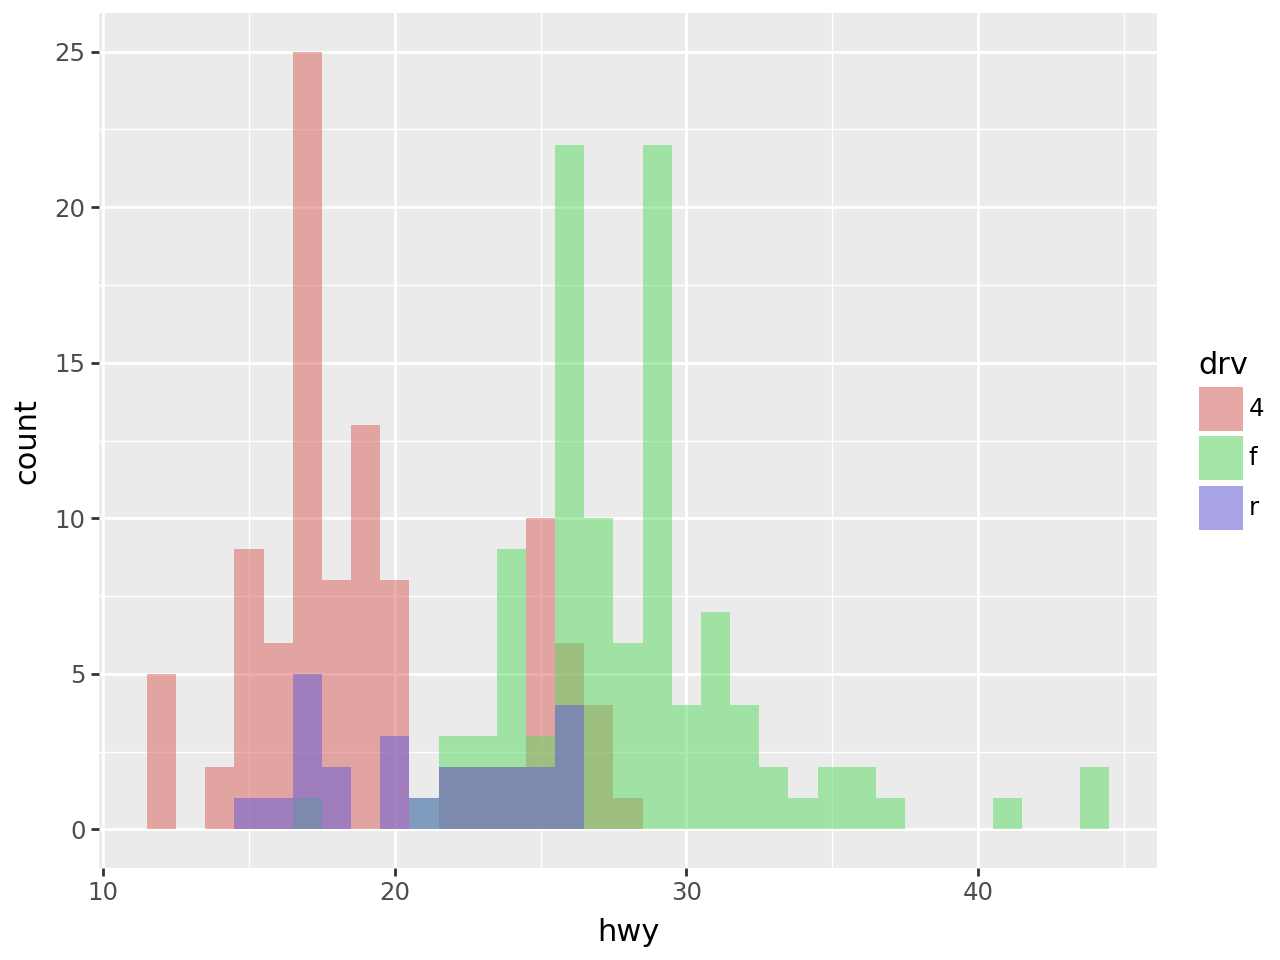

In [174]:
g2 = ggplot(mpg, aes(x="hwy", fill="drv"))
g2 + geom_histogram(binwidth=1, position="identity", alpha=0.5)

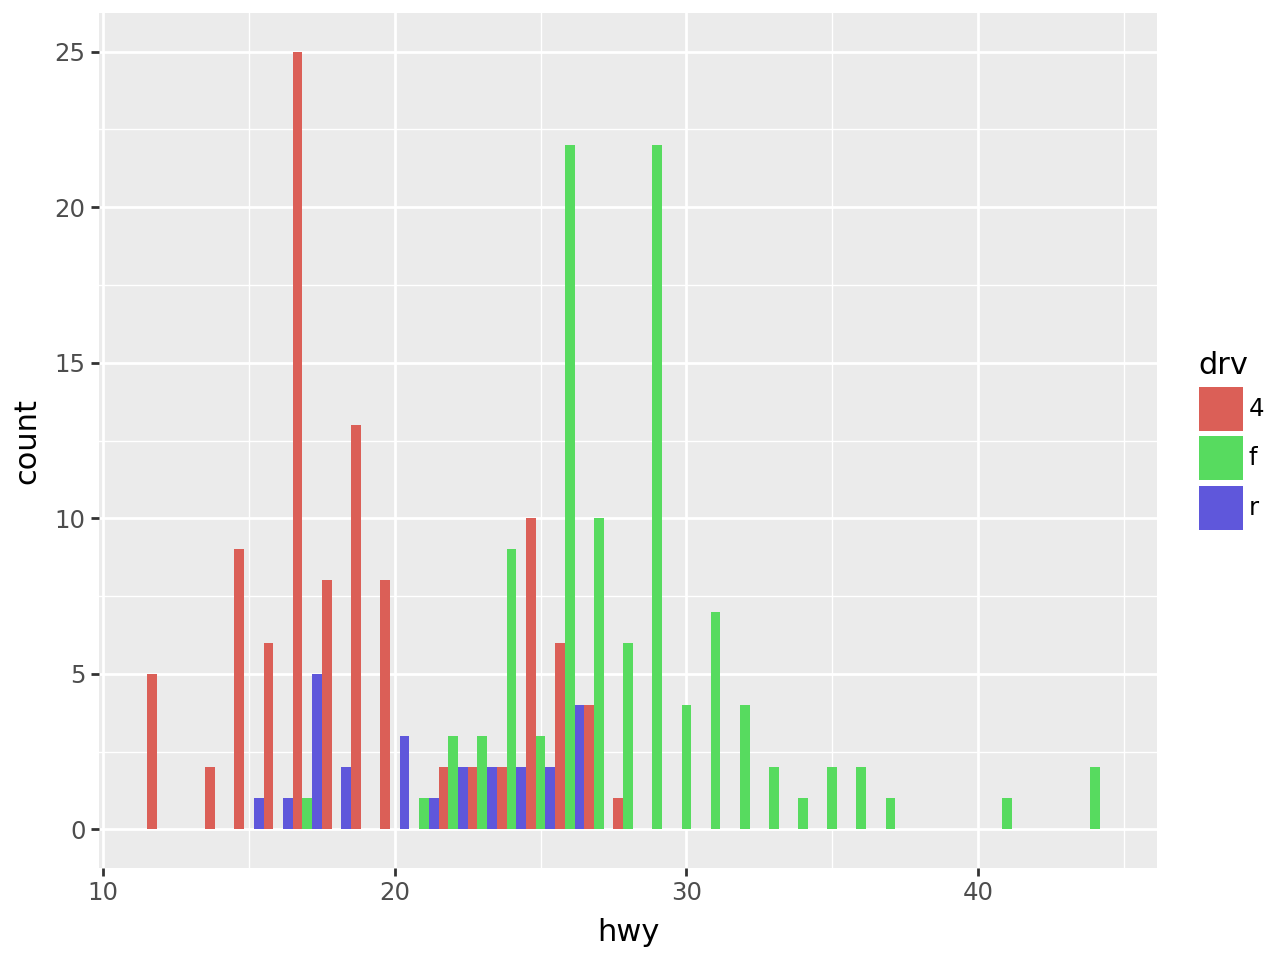

In [175]:
g2 + geom_histogram(binwidth=1, position="dodge")

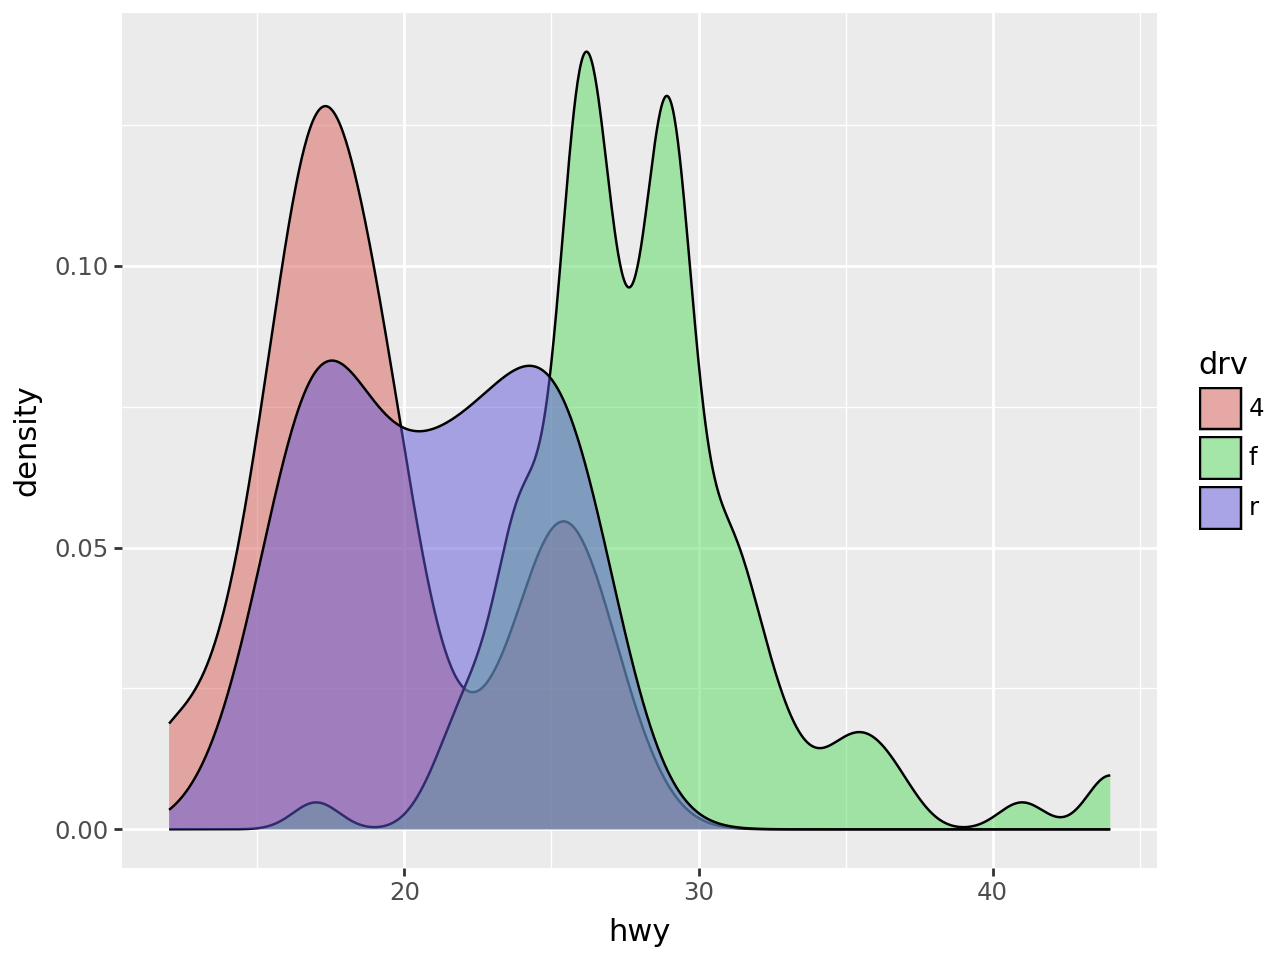

In [176]:
g2 + geom_density(alpha=0.5)

What about adding a reference line? e.g. highlighting the mean or median.

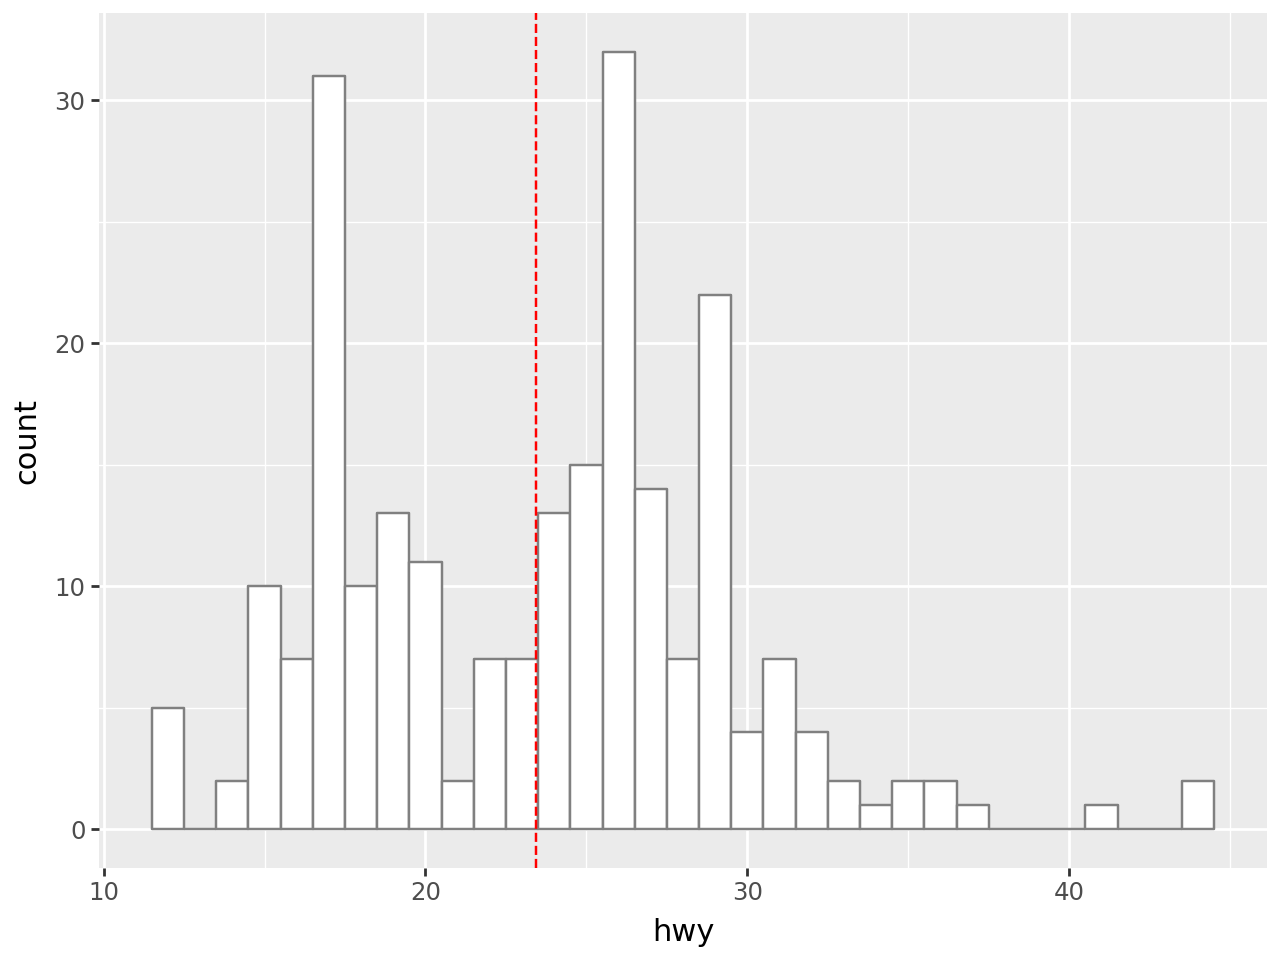

In [177]:
from plotnine import geom_vline
g + geom_histogram(binwidth=1, color="grey", fill="white") + geom_vline(xintercept=np.mean(mpg.hwy), color="red", linetype="dashed")

## Boxplots & Co.
In ggplot, you draw a boxplot adding the geometry `geom_boxplot()`. 


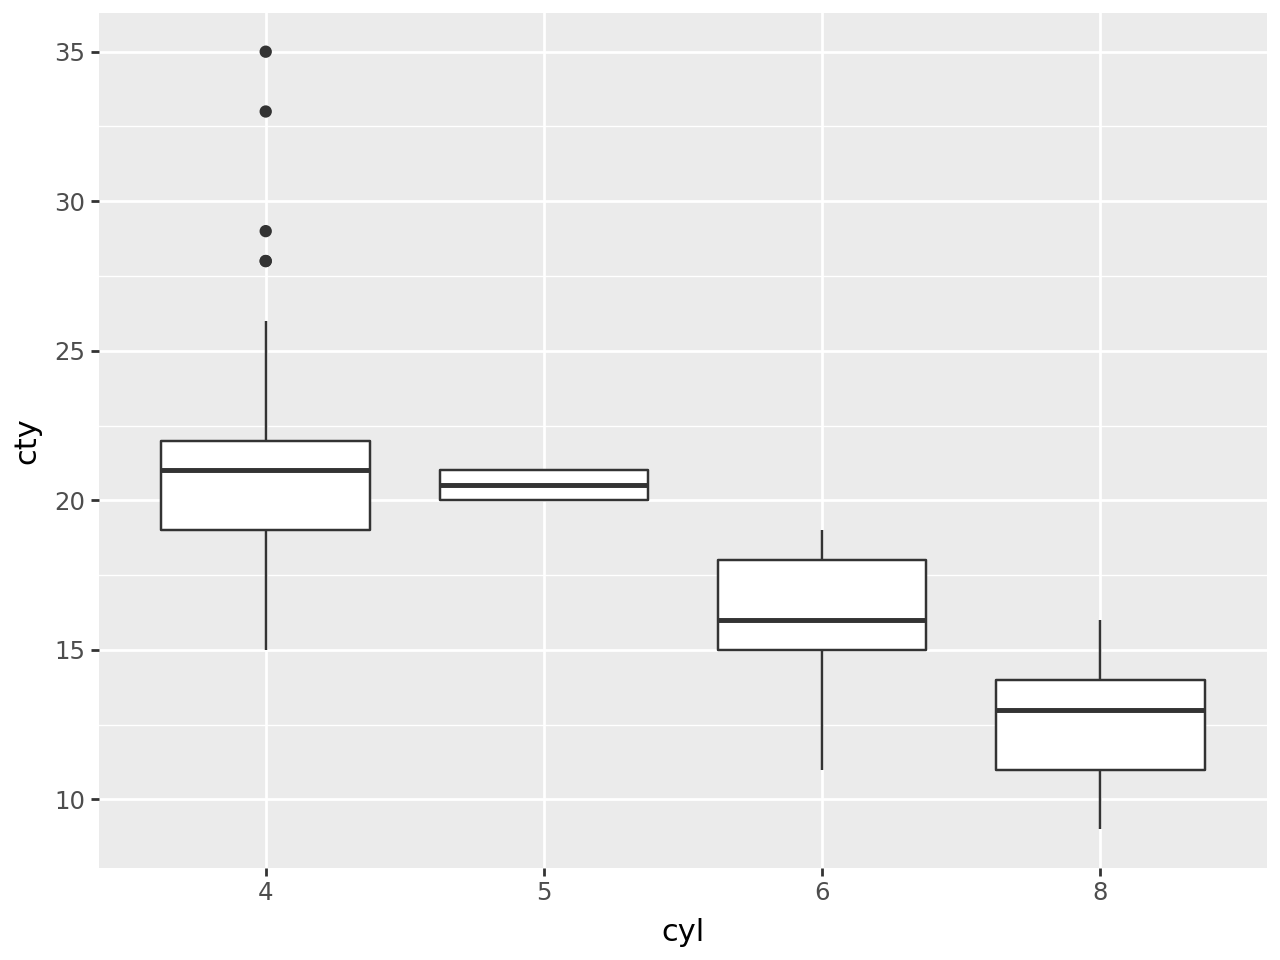

In [178]:
from plotnine import geom_boxplot
bp = ggplot(mpg, aes(x="cyl", y="cty"))
bp + geom_boxplot()

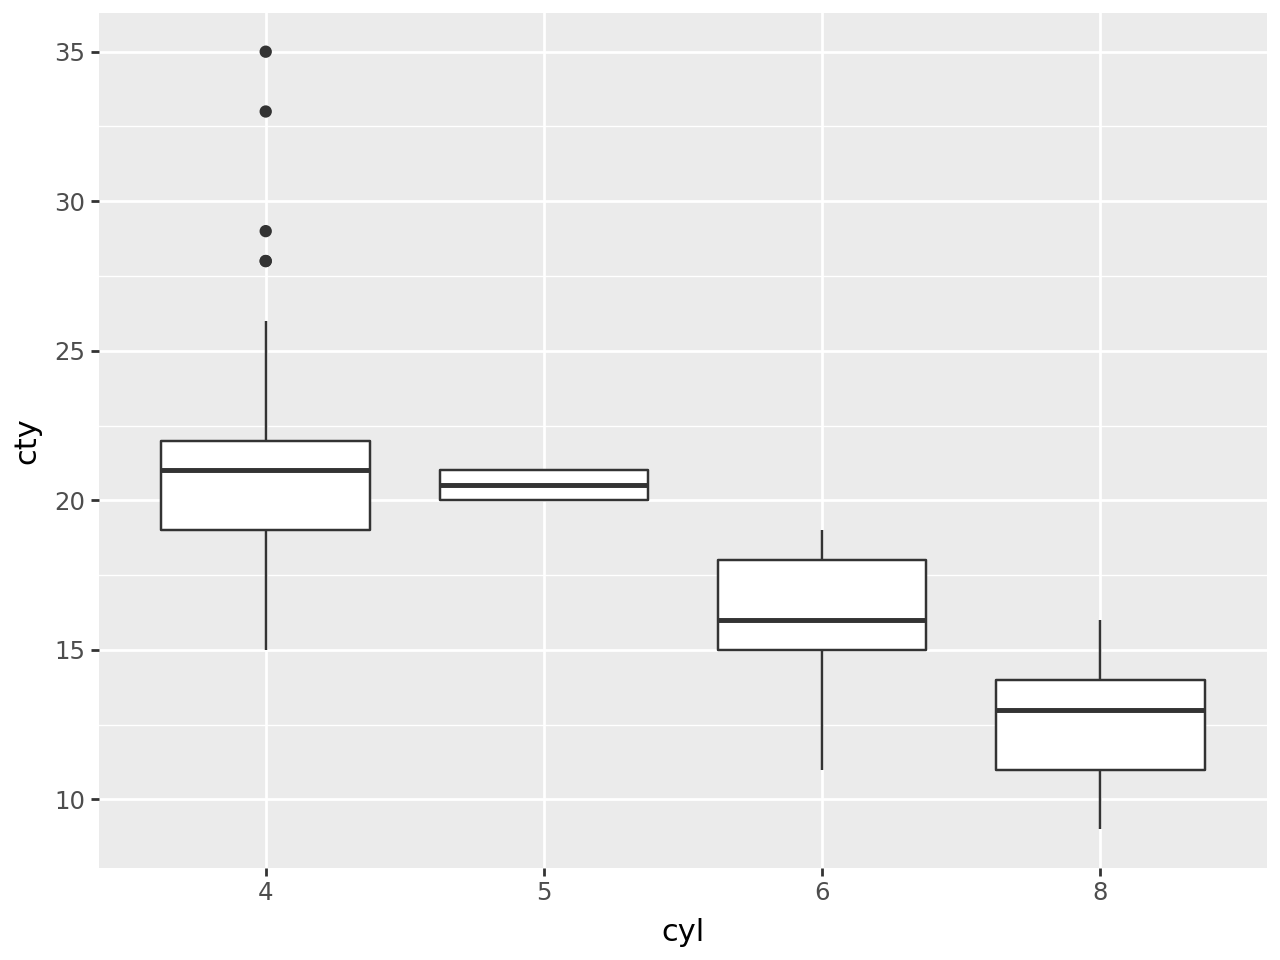

In [ ]:
mpg['cyl'] = mpg['cyl'].astype(str)
# boxplots expect categorical variables, if it is a numerical value
# it won't be able to generate a box for each value
bp = ggplot(mpg, aes(x="cyl", y="cty"))
bp + geom_boxplot()

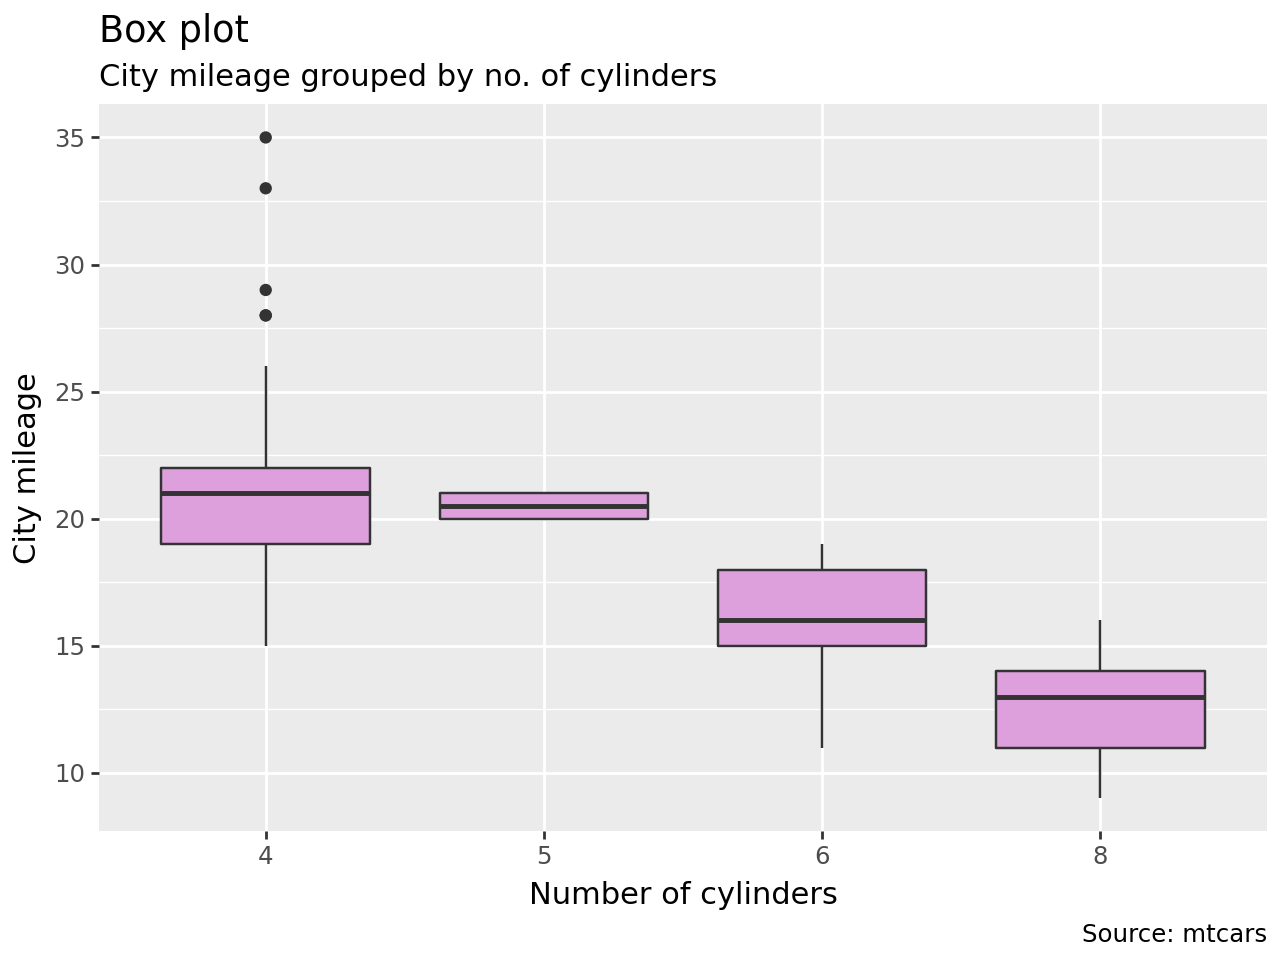

In [180]:
bp + geom_boxplot() + coord_flip()

bp + geom_boxplot(fill="plum") +  labs(title="Box plot", 
         subtitle="City mileage grouped by no. of cylinders",
         caption="Source: mtcars",
         x="Number of cylinders",
         y="City mileage")

Setting `varwidth=TRUE` adjusts the width of the boxes to be proportional to the number of observation it contains.

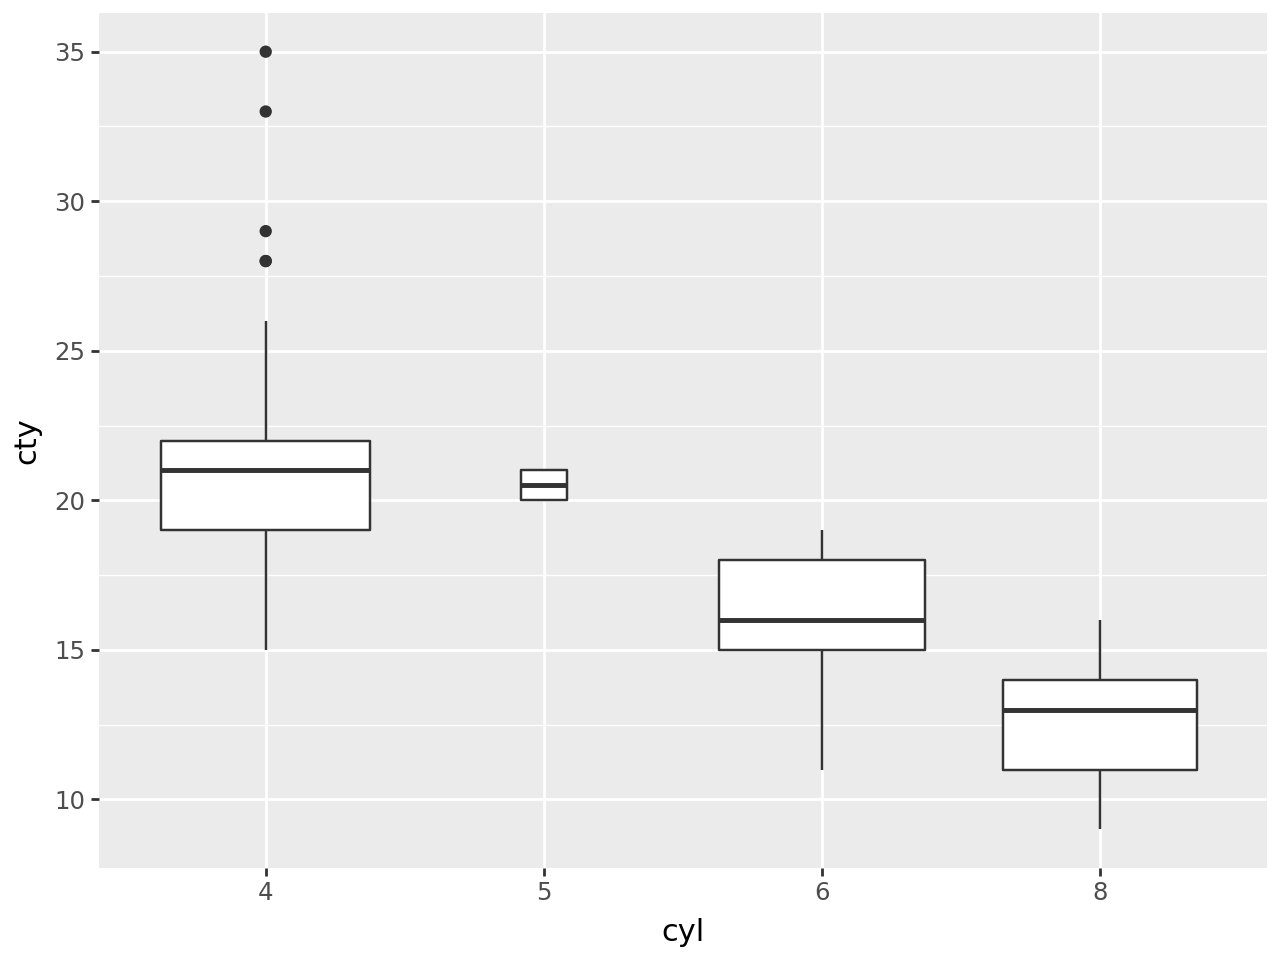

In [181]:
bp + geom_boxplot(varwidth=True)

You can easily obtain a grouped box plot by stratifying on a factor variable:

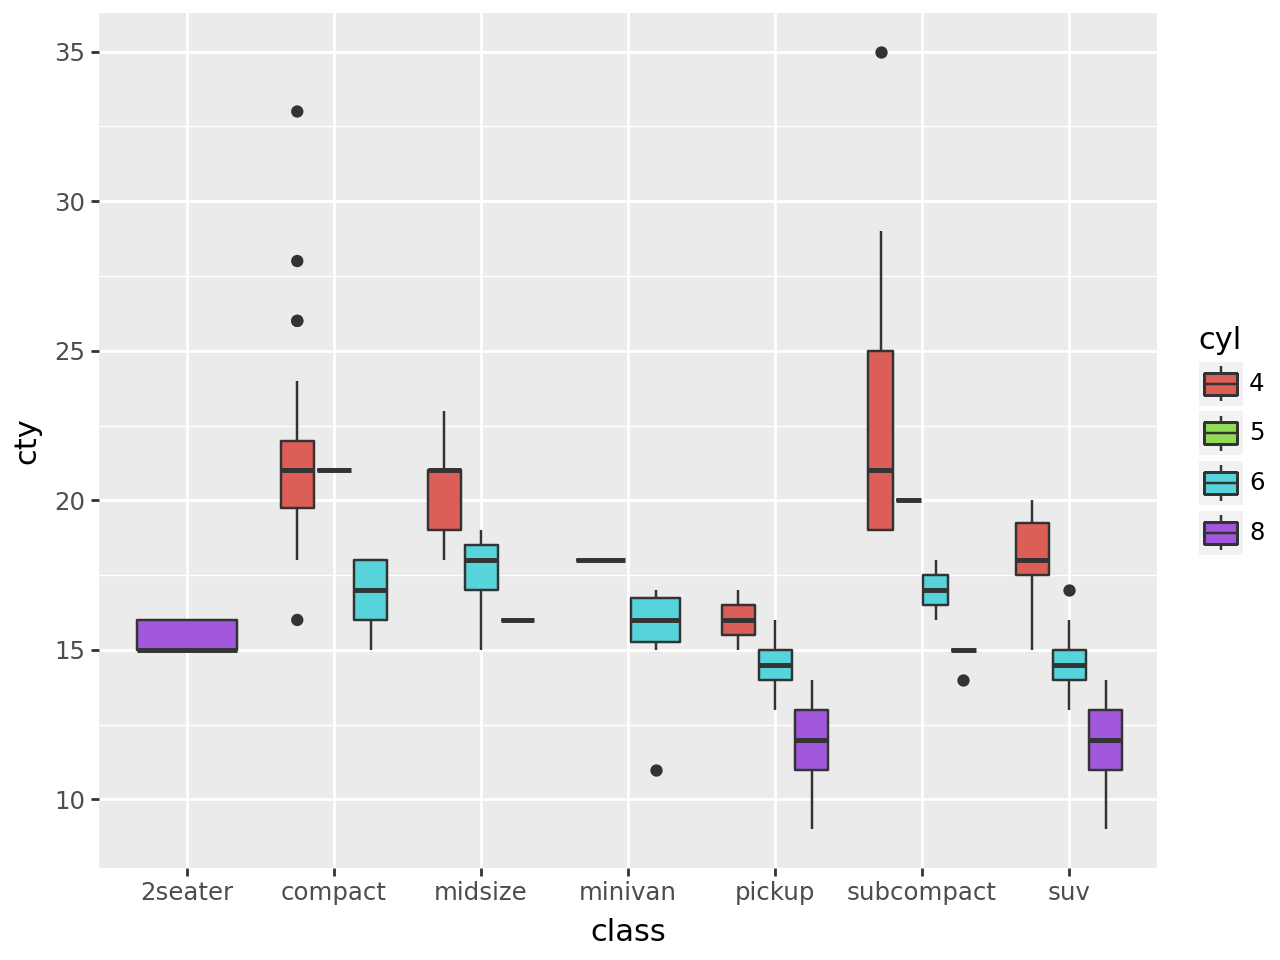

In [182]:
bp = ggplot(mpg, aes(x="class", y="cty"))
bp + geom_boxplot(aes(fill="cyl"))

A common issue with boxplots is that they may "hide" information! This is because they *summarize* the distributions of numerical variables for different groups. One way to improve this is by overplotting the actual data (jittered for readability).

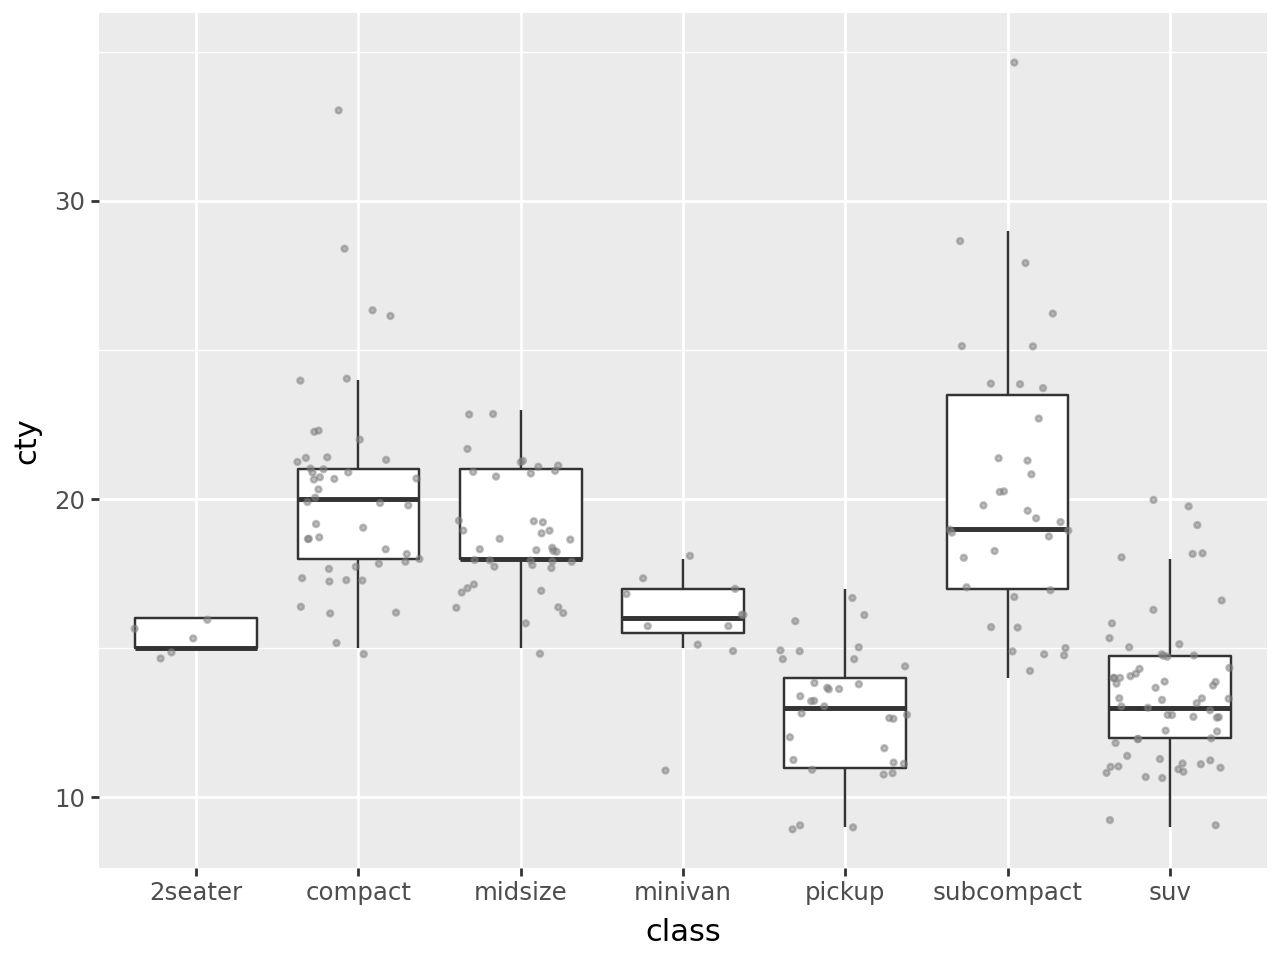

In [183]:
from plotnine import geom_jitter
bp + geom_boxplot(outlier_color="none") + geom_jitter(alpha=0.5, size=0.7, color="grey")

### Violin plots

/home/dorijan/Desktop/dataviz/.venv/lib/python3.12/site-packages/plotnine/positions/position.py:232: PlotnineWarning: position_dodge requires non-overlapping x intervals


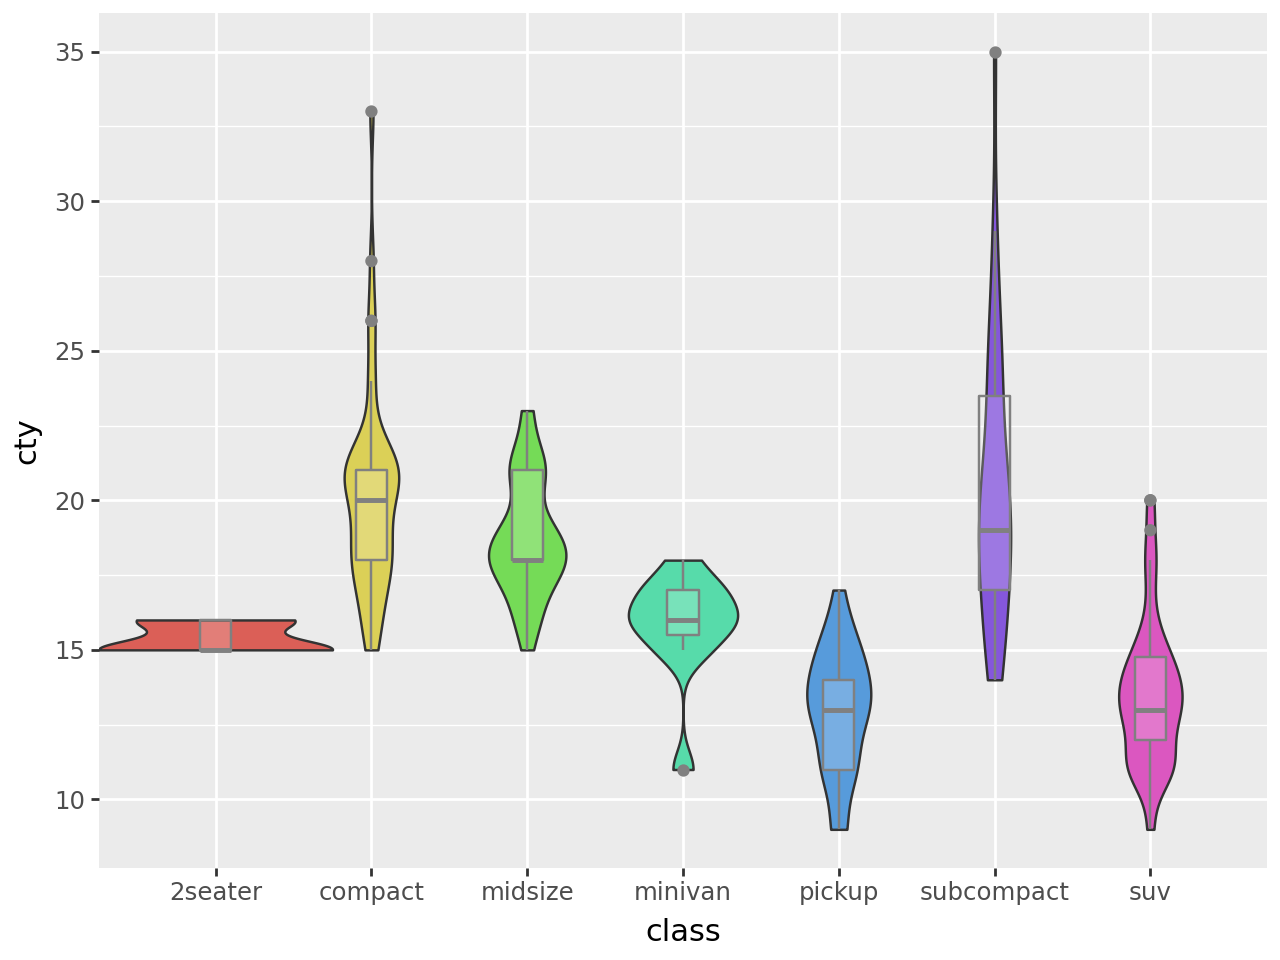

In [184]:
from plotnine import geom_violin
bp + geom_violin(aes(fill ="class"),width=1.5) + geom_boxplot(width=0.2, color="gray", alpha=0.2) + theme(legend_position="none")

# Faceting

With facets, you can "decompose" a data plot into multiple different subplots, according to each value in one or two categorical variables.

## `facet_grid`

To create a plot with multiple facets, use the function `facet_grid()`, which will output a row or a column of subplots, one for each level of the categorical variable. If you input two categorical variables, the subplots are arranged in a grid.

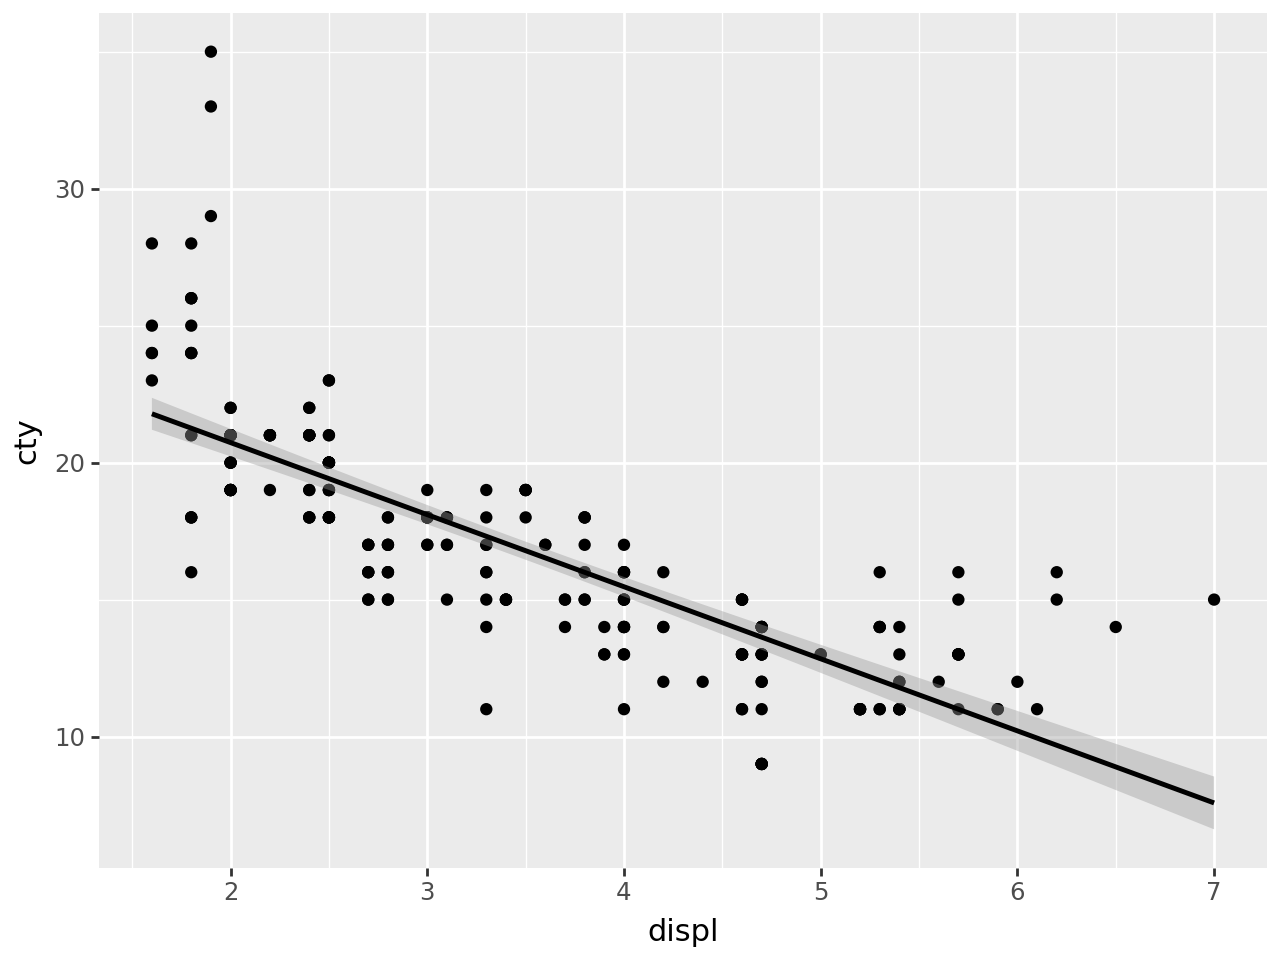

In [185]:
from plotnine import facet_grid, geom_smooth
p = ggplot(mpg, aes(x="displ", y="cty")) + geom_point() + geom_smooth(method="lm")
p.show()

p + facet_grid("~ class") # LHS variable -> across rows; RHS variable -> across columns
p + facet_grid("class ~")

/home/dorijan/Desktop/dataviz/.venv/lib/python3.12/site-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/home/dorijan/Desktop/dataviz/.venv/lib/python3.12/site-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/home/dorijan/Desktop/dataviz/.venv/lib/python3.12/site-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/home/dorijan/Desktop/dataviz/.venv/lib/python3.12/site-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing req

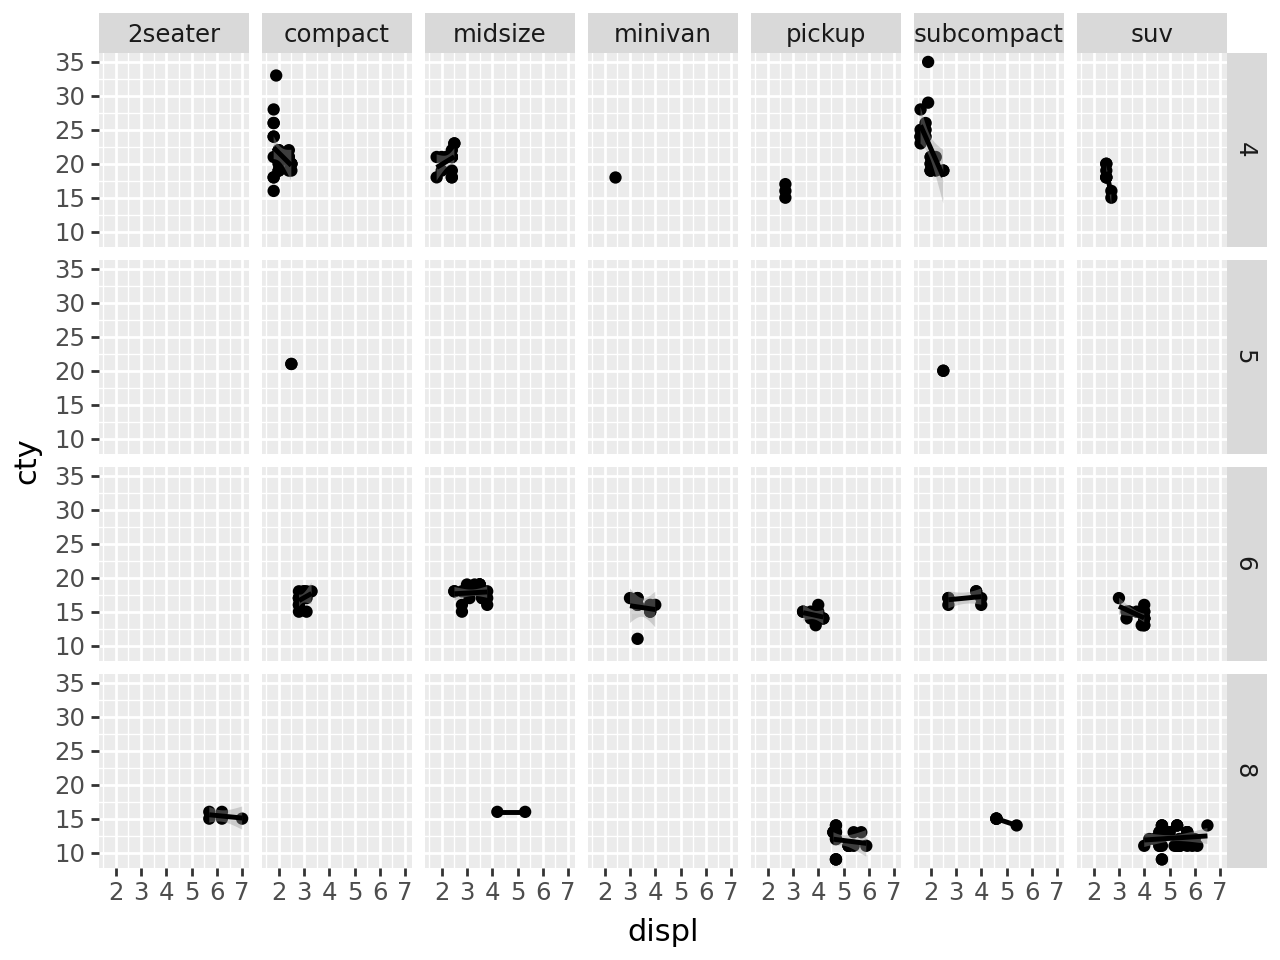

In [186]:
p + facet_grid('cyl ~ class')

## `facet_wrap`

If you only need to stratify the subplots by a single categorical variable, you can use the `facet_wrap()` variant. Optionally, you can specify the number of rows or columns with an additional argument (`nrow`, `ncol`).

By default, the scales of all subplots are the same for all panels. To leave them free to vary, set `scales="free"`.

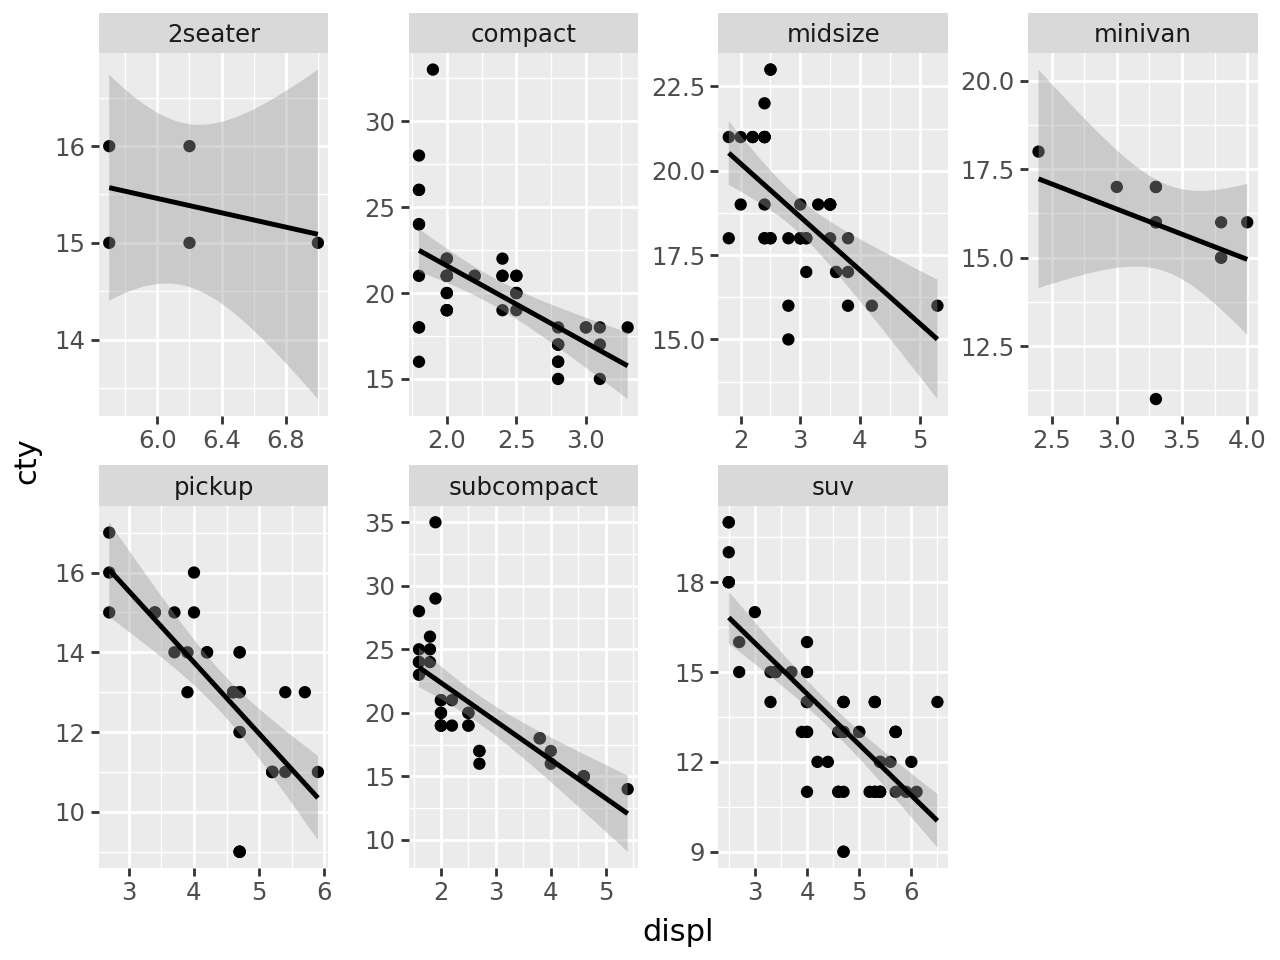

In [187]:
from plotnine import facet_wrap
p + facet_wrap("~ class", nrow=2, scales="free")

## Arranging plots
In R you can use the Patchwork library, in plotnine, you have to save figures seperately

## Modifying plot background, major and minor axis
Adding a call to `theme()` as the final layer, we can change the properties of the plot background (`panel_background`), border (`panel_border`), grid (`panel_grid.major`, `panel_grid.minor`), and axis lines (`axis_line_x`, `axis_line_y`).

- The background is a figure-like object, so we use `element_rect()` inside the call to `theme()`;
- The grid and the axis lines are line-like objects, so we have to use `element_line()`;
- To switch off a component, we use `element_blank()`

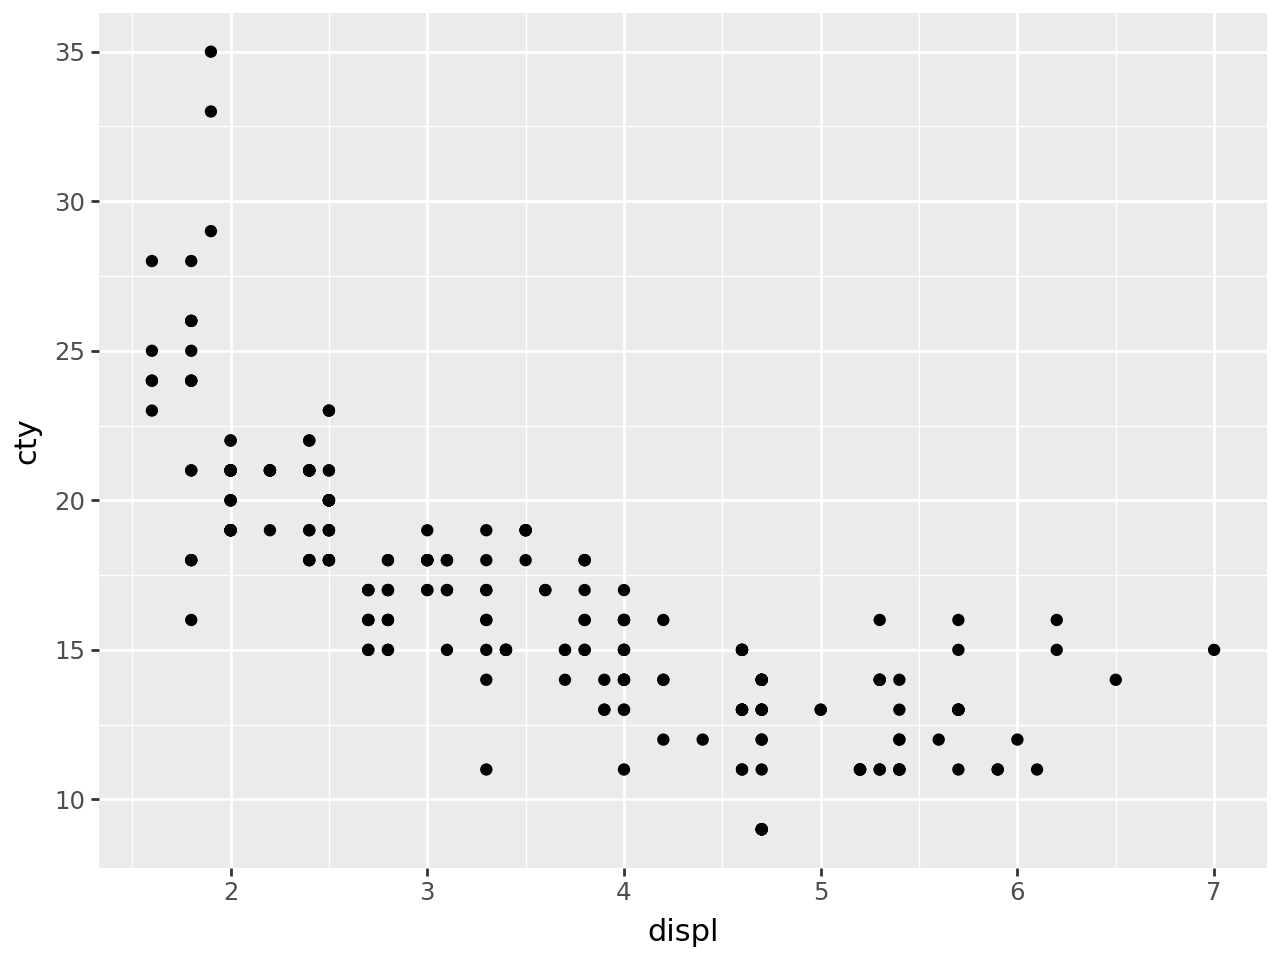

In [188]:
gg = ggplot(mpg, aes(x="displ", y="cty")) + geom_point()
gg.show()

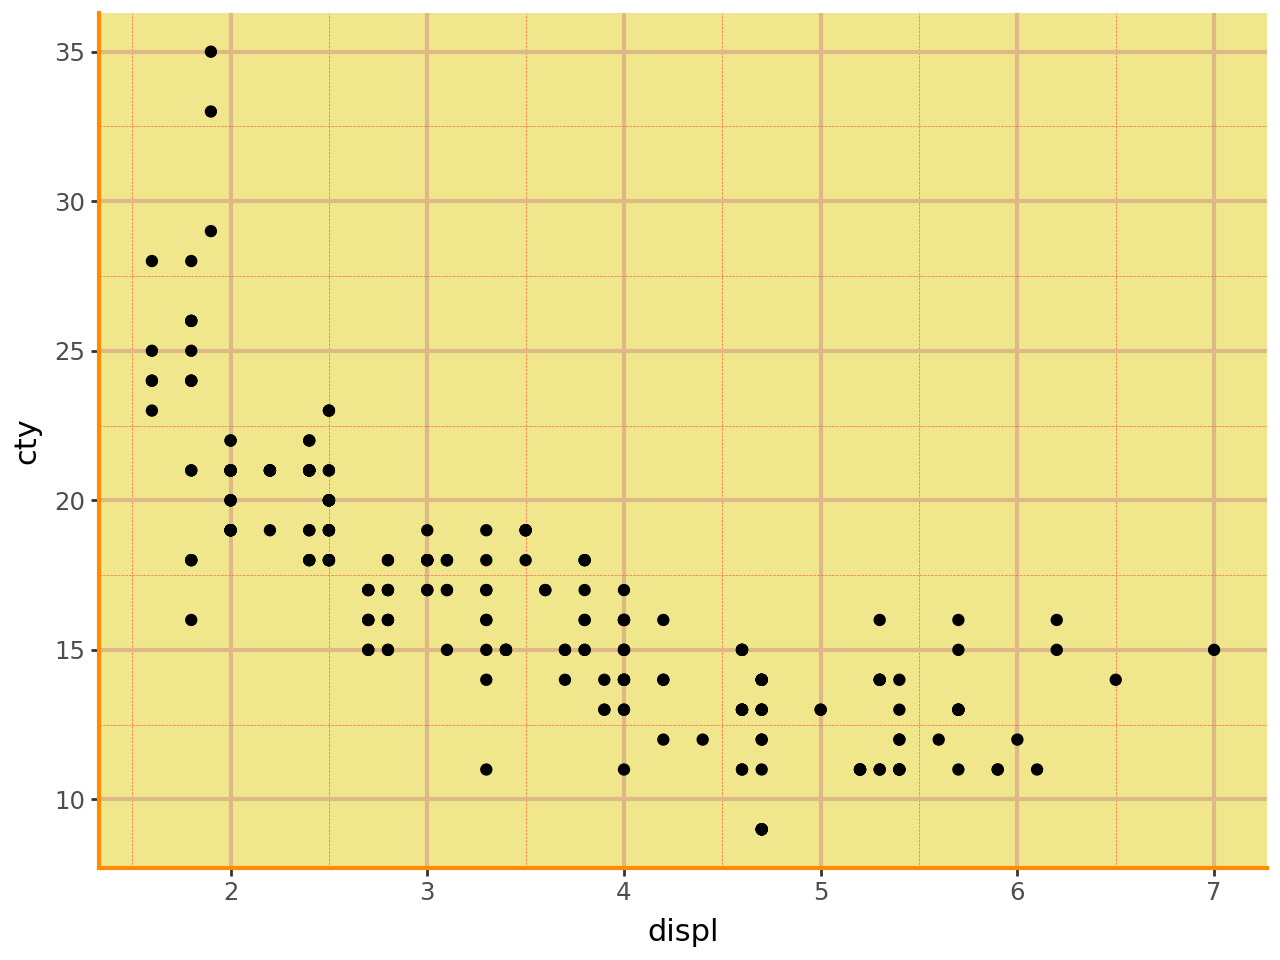

In [189]:
from plotnine import element_line, element_blank, element_rect
gg + theme_bw() + theme(
        panel_background=element_rect(fill='khaki'),
        panel_grid_major=element_line(color='burlywood', size=1.5),
        panel_grid_minor=element_line(color='tomato', size=0.25, linetype='dashed'),
        panel_border=element_blank(),
        axis_line_x=element_line(color='darkorange', size=1.5, lineend='butt'),
        axis_line_y=element_line(color='darkorange', size=1.5)
    )


# Remove major/minor grids, axis titles

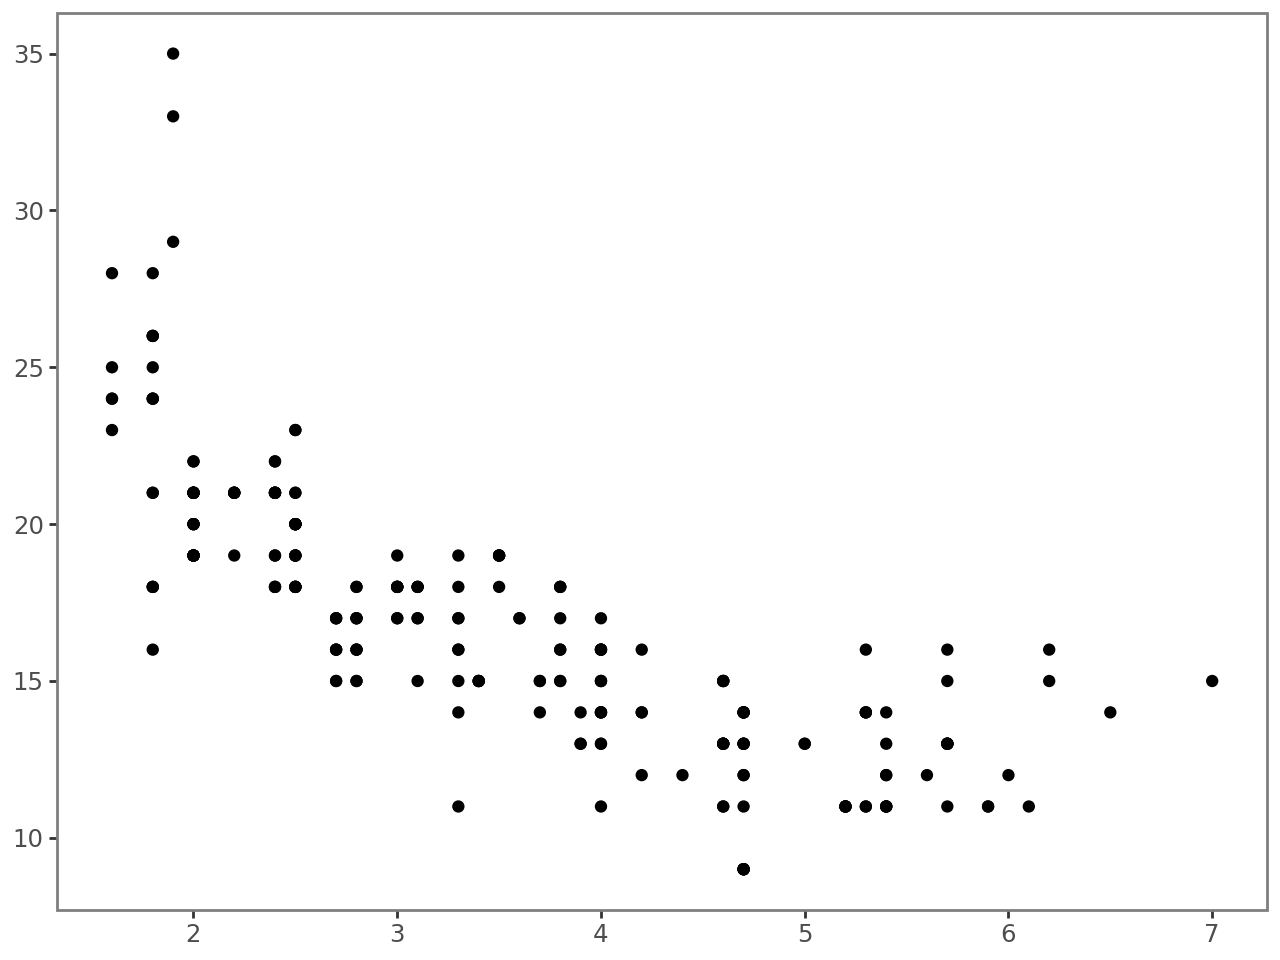

In [190]:
gg + theme_bw() + theme(
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        axis_title_x=element_blank(),
        axis_title_y=element_blank()
    )

# Acknowledgements and sources

Stéphane Guillou (CC BY 4.0) & Hadley Wickham (CC BY-NC-SA 4.0).